In [1]:
#import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
import copy

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


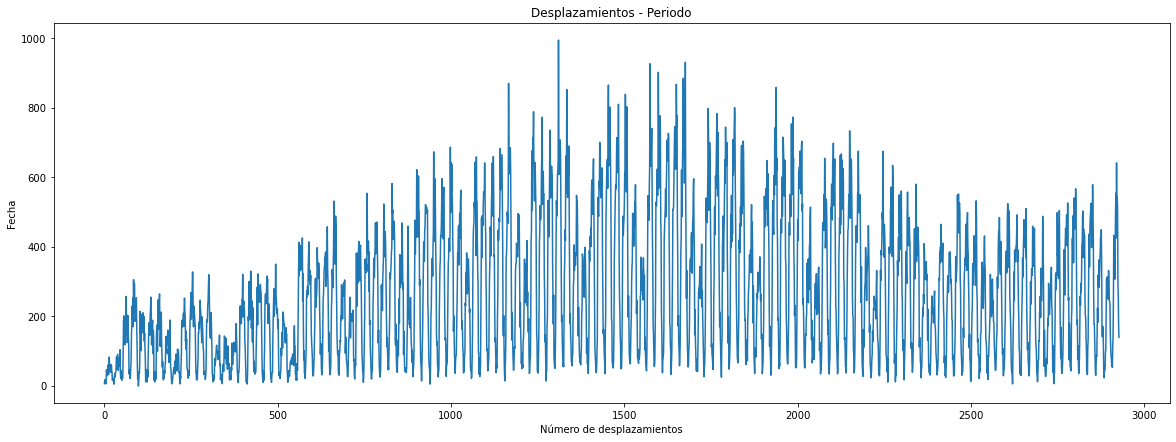

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# PROPHET
## Definimos datos de entrenamiento y datos de prueba

In [7]:
X = Periodo1.y
Y = Periodo1.ds
size = int(len(X) * 0.90)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

## Encontramos el número de Días que se van a analizar 

In [8]:
#Test.head()
start = Train.iloc[0]['ds']
end = Train.iloc[-1]['ds'] 
N_Dias = pd.date_range(start, end, freq='D')
print(len(N_Dias))

110


In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)
def est_Martes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 1)
def est_Miercoles(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 2)
def est_Jueves(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 3)
def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)
def est_Sabado(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5)
def est_Domingo(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 6)

# Train['Lunes'] = Train['ds'].apply(est_Lunes)
# Train['Martes'] = Train['ds'].apply(est_Martes)
# Train['Miercoles'] = Train['ds'].apply(est_Miercoles)
# Train['Jueves'] = Train['ds'].apply(est_Jueves)
# Train['Viernes'] = Train['ds'].apply(est_Viernes)
# Train['Sabado'] = Train['ds'].apply(est_Sabado)
# Train['Domingo'] = Train['ds'].apply(est_Domingo)

# Test['Lunes'] = Test['ds'].apply(est_Lunes)
# Test['Martes'] = Test['ds'].apply(est_Martes)
# Test['Miercoles'] = Test['ds'].apply(est_Miercoles)
# Test['Jueves'] = Test['ds'].apply(est_Jueves)
# Test['Viernes'] = Test['ds'].apply(est_Viernes)
# Test['Sabado'] = Test['ds'].apply(est_Sabado)
# Test['Domingo'] = Test['ds'].apply(est_Domingo)

In [10]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

Train['Lunes1AM'] = Train['ds'].apply(est_Lunes1AM)
Test['Lunes1AM'] = Test['ds'].apply(est_Lunes1AM)

Train['Lunes2AM'] = Train['ds'].apply(est_Lunes2AM)
Test['Lunes2AM'] = Test['ds'].apply(est_Lunes2AM)

Train['Lunes3AM'] = Train['ds'].apply(est_Lunes3AM)
Test['Lunes3AM'] = Test['ds'].apply(est_Lunes3AM)

Train['Lunes4AM'] = Train['ds'].apply(est_Lunes4AM)
Test['Lunes4AM'] = Test['ds'].apply(est_Lunes4AM)

Train['Lunes5AM'] = Train['ds'].apply(est_Lunes5AM)
Test['Lunes5AM'] = Test['ds'].apply(est_Lunes5AM)

Train['Lunes6AM'] = Train['ds'].apply(est_Lunes6AM)
Test['Lunes6AM'] = Test['ds'].apply(est_Lunes6AM)

Train['Lunes7AM'] = Train['ds'].apply(est_Lunes7AM)
Test['Lunes7AM'] = Test['ds'].apply(est_Lunes7AM)

Train['Lunes8AM'] = Train['ds'].apply(est_Lunes8AM)
Test['Lunes8AM'] = Test['ds'].apply(est_Lunes8AM)

Train['Lunes9AM'] = Train['ds'].apply(est_Lunes9AM)
Test['Lunes9AM'] = Test['ds'].apply(est_Lunes9AM)

Train['Lunes10AM'] = Train['ds'].apply(est_Lunes10AM)
Test['Lunes10AM'] = Test['ds'].apply(est_Lunes10AM)

Train['Lunes11AM'] = Train['ds'].apply(est_Lunes11AM)
Test['Lunes11AM'] = Test['ds'].apply(est_Lunes11AM)

Train['Lunes12PM'] = Train['ds'].apply(est_Lunes12PM)
Test['Lunes12PM'] = Test['ds'].apply(est_Lunes12PM)

Train['Lunes13PM'] = Train['ds'].apply(est_Lunes13PM)
Test['Lunes13PM'] = Test['ds'].apply(est_Lunes13PM)

Train['Lunes14PM'] = Train['ds'].apply(est_Lunes14PM)
Test['Lunes14PM'] = Test['ds'].apply(est_Lunes14PM)

Train['Lunes15PM'] = Train['ds'].apply(est_Lunes15PM)
Test['Lunes15PM'] = Test['ds'].apply(est_Lunes15PM)

Train['Lunes16PM'] = Train['ds'].apply(est_Lunes16PM)
Test['Lunes16PM'] = Test['ds'].apply(est_Lunes16PM)

Train['Lunes17PM'] = Train['ds'].apply(est_Lunes17PM)
Test['Lunes17PM'] = Test['ds'].apply(est_Lunes17PM)

Train['Lunes18PM'] = Train['ds'].apply(est_Lunes18PM)
Test['Lunes18PM'] = Test['ds'].apply(est_Lunes18PM)

Train['Lunes19PM'] = Train['ds'].apply(est_Lunes19PM)
Test['Lunes19PM'] = Test['ds'].apply(est_Lunes19PM)

Train['Lunes20PM'] = Train['ds'].apply(est_Lunes20PM)
Test['Lunes20PM'] = Test['ds'].apply(est_Lunes20PM)

Train['Lunes21PM'] = Train['ds'].apply(est_Lunes21PM)
Test['Lunes21PM'] = Test['ds'].apply(est_Lunes21PM)

Train['Lunes22PM'] = Train['ds'].apply(est_Lunes22PM)
Test['Lunes22PM'] = Test['ds'].apply(est_Lunes22PM)

Train['Lunes23PM'] = Train['ds'].apply(est_Lunes23PM)
Test['Lunes23PM'] = Test['ds'].apply(est_Lunes23PM)

Train['Lunes24AM'] = Train['ds'].apply(est_Lunes24AM)
Test['Lunes24AM'] = Test['ds'].apply(est_Lunes24AM)



In [11]:
#Train.iloc[210:250,:]

## Hacemos ciclo for para predecir el día siguiente uno tras otro
## La predicción se demora 50 minutos

In [ ]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():       
    history = Train.copy()   # El problema es en history    
    
    for t in range(len(test_X)):        
        m = Prophet()
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

        m.add_seasonality(name='Lunes1AM_season', period=123, fourier_order=7, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=123, fourier_order=7, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=123, fourier_order=7, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=123, fourier_order=7, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=123, fourier_order=7, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=123, fourier_order=7, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=123, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=123, fourier_order=7, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=123, fourier_order=7, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=123, fourier_order=7, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=123, fourier_order=7, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=123, fourier_order=7, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=123, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=123, fourier_order=7, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=123, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=123, fourier_order=7, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=123, fourier_order=7, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=123, fourier_order=7, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=123, fourier_order=7, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=123, fourier_order=7, condition_name='Lunes20PM')
        m.add_seasonality(name='Lunes21PM_season', period=123, fourier_order=7, condition_name='Lunes21PM')
        m.add_seasonality(name='Lunes22PM_season', period=123, fourier_order=7, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=123, fourier_order=7, condition_name='Lunes23PM')
        m.add_seasonality(name='Lunes24AM_season', period=123, fourier_order=7, condition_name='Lunes24AM')
        
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')   
#         future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)
#         future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)
#         future['Lunes2PM'] = future['ds'].apply(est_Lunes2PM)

        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]        
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        predictions.append(yhat)
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [Test[['ds']].iloc[t]], 'y': [Test[['y']].iloc[t]]}
        obs = pd.DataFrame(Test[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig
        

fig = rolling_forecast()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.6806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5151.42    0.00797222         223.2      0.5668      0.5668      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5158.56    0.00151716        52.121       0.951       0.951      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5161.66    0.00196816       90.1809           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       5161.93   0.000366758       136.294   6.479e-06       0.001      489  LS failed, Hessian reset 
     399       5162.07    0.00288061       59.7173           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     460       5162.14   1.44288e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=426.682018, expected=391.765000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5154.63    0.00292717       105.698      0.2275           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5163.34     0.0001144       55.1882      0.3102      0.3102      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5163.56    0.00165017       130.805   2.554e-05       0.001      270  LS failed, Hessian reset 
     242       5163.78    0.00014906        105.01   1.758e-06       0.001      363  LS failed, Hessian reset 
     288       5163.93   0.000353181       107.362   4.675e-06       0.001      481  LS failed, Hessian reset 
     299       5163.95   1.21876e-05        61.782      0.2248      0.2248      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.054080, expected=303.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.4525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5153.48    0.00591703       91.0375           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5164.95    0.00330843       188.623       2.931      0.2931      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5165.86   0.000113846       73.9973   1.201e-06       0.001      345  LS failed, Hessian reset 
     299       5166.03   0.000953221       54.2038      0.7134      0.7134      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       5166.28   0.000338482       163.835   3.577e-06       0.001      550  LS failed, Hessian reset 
     384       5166.33   3.34175e-05       59.7994   5.432e-07       0.001      615  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=316.375052, expected=234.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.6374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5155.86     0.0072537        447.63      0.1195           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5166.96   0.000277744       95.7771      0.5059      0.5059      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5168.01   0.000596687       92.8385    9.96e-06       0.001      392  LS failed, Hessian reset 
     299       5168.05   3.72388e-05       88.7841     0.07144           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5168.23   0.000548703       57.8033           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5168.23   7.78537e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=217.176885, expected=193.813000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.1804
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5157.45     0.0231204       125.059           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5168.78    0.00082866       57.4344      0.9807      0.9807      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5169.93   0.000340667       36.2583           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5170.13   0.000665398       114.967   8.736e-06       0.001      438  LS failed, Hessian reset 
     399        5170.4   1.38914e-06        63.736      0.2309           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5170.56     1.416e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=138.464423, expected=106.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5161.4    0.00670779       363.495       0.252           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       5163.69   0.000393586       182.969   4.135e-06       0.001      178  LS failed, Hessian reset 
     199       5171.25   0.000948983       57.6951      0.3345           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5172.72   0.000866578       90.2536      0.9821      0.9821      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       5172.81   2.70894e-05       64.1006   4.232e-07       0.001      534  LS failed, Hessian reset 
     394       5172.81   2.40941e-06       55.2318      0.2427           1      591   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=96.026066, expected=98.351000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -114.063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5166.44     0.0104398       625.461      0.9554      0.9554      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5174.07    0.00867858       69.3843           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5174.93   0.000115188       63.0362   1.273e-06       0.001      334  LS failed, Hessian reset 
     295       5175.16   9.56091e-05       42.5783   1.785e-06       0.001      434  LS failed, Hessian reset 
     299       5175.17   9.06709e-07       40.0283     0.09731      0.2733      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5175.17   2.21724e-05       53.0244   5.448e-07       0.001      487  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=76.851641, expected=35.206000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5166.1    0.00546269       171.233           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5176.51     0.0109855       144.646           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5176.53   0.000148099       94.7034   1.169e-06       0.001      289  LS failed, Hessian reset 
     268       5177.22   0.000190244       86.1599   2.818e-06       0.001      414  LS failed, Hessian reset 
     299       5177.23   2.88155e-06        67.388      0.8267      0.8267      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     391       5177.44   0.000852559       108.196    1.16e-05       0.001      626  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=56.513168, expected=34.291000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.96
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5168.91    0.00244485       113.892      0.9529      0.9529      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5177.57   0.000632088       106.684      0.4881      0.4881      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5179.95    0.00016155       59.5056           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          5180   0.000347159       71.0459      0.5839           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     487       5180.01   8.99241e-07       55.9675       0.556      0.8666      617   
Optimization terminated normally: 
  Convergence detected: relati

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=32.093366, expected=42.368000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5170.81    0.00477943       194.934      0.7401      0.7401      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5180.7    0.00191867       146.075      0.9516      0.9516      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5182.43   2.47839e-05       54.8425           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5182.55   5.80213e-05       53.5732       2.981      0.7084      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     466        5182.6   0.000202301       76.5829   3.145e-06       0.001      621  LS failed, Hessian reset 
     499       5182.63   3.47554e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=26.432103, expected=30.192000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.49
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5174.08     0.0102299       663.757      0.4565           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5184.1    0.00137053        67.219      0.1718           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5184.92   0.000637814       109.027           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       5185.16   8.15639e-05       63.6038   1.554e-06       0.001      515  LS failed, Hessian reset 
     399       5185.18   4.13826e-05       81.2373           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447       5185.19   1.30467e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=61.418167, expected=30.377000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.424
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5175.66     0.0032004       151.845           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5186.86     0.0052459       68.8656       1.436      0.1436      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       5187.41   0.000132251       83.2706   2.663e-06       0.001      378  LS failed, Hessian reset 
     299       5187.45   0.000605223       89.8364      0.2749           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       5187.47    1.6294e-05       49.3409   2.538e-07       0.001      515  LS failed, Hessian reset 
     399       5187.49   7.73532e-07       47.0223      0.8782     0.08782      612   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=133.670427, expected=168.007000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5180.99    0.00651144       710.046           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       5185.29   0.000326916       158.049   3.305e-06       0.001      245  LS failed, Hessian reset 
     199        5186.8   0.000995261       97.5147      0.5983      0.5983      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5189.71   7.09597e-05       69.4938      0.5199      0.5199      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5189.74   0.000123961       81.2355   1.421e-06       0.001      467  LS failed, Hessian reset 
     354       5189.77   2.95202e-06       50.0562   6.803e-08       0.001      581  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=215.880668, expected=219.592000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.8367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5181.35    0.00518131       333.688           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5190.57    0.00164882       67.5839      0.7699      0.7699      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5191.98   8.39832e-05       73.1221    1.34e-06       0.001      412  LS failed, Hessian reset 
     299       5191.98   2.99152e-05       60.4064      0.6553      0.6553      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5192.01   7.15684e-08       58.1596     0.02628      0.4912      497   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=273.901374, expected=277.609000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.5036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5182.26    0.00788584        848.28           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5191.16     0.0162024       103.838      0.9862     0.09862      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5193.95   0.000153255       99.4217   2.047e-06       0.001      365  LS failed, Hessian reset 
     299       5194.01   7.74428e-07       50.3248     0.05416           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5194.04   0.000325419       168.924    3.17e-06       0.001      460  LS failed, Hessian reset 
     349       5194.07   6.73124e-06       53.6211   1.376e-07       0.001      549  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=298.413163, expected=368.209000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.3585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5186.46    0.00514147       144.567       0.578       0.578      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5195.23     0.0111133        63.383           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5196.32      0.005042       76.1067       2.204           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5196.33   0.000293769        137.23    3.86e-06       0.001      425  LS failed, Hessian reset 
     343       5196.47   3.84775e-05       67.3831   6.669e-07       0.001      515  LS failed, Hessian reset 
     380       5196.47   3.60277e-07       58.8437      0.6424      0.6424      569   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=312.282094, expected=313.153000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.6757
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5189.71     0.0185631        238.56           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5198.66     0.0019779       91.0049           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5198.81   0.000182987       93.6606   2.527e-06       0.001      328  LS failed, Hessian reset 
     268       5198.88   0.000178307       91.0209    2.73e-06       0.001      426  LS failed, Hessian reset 
     299       5198.89   7.52114e-05       81.3399        4.93       0.493      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304        5198.9   6.30634e-05        66.775    1.03e-06       0.001      515  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=338.632005, expected=390.574000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.9954
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5187.87     0.0752439        344.89           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5199.77    0.00588996       85.6064           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5201.42    0.00166779       57.8496           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       5201.72   0.000154901       112.156   1.678e-06       0.001      454  LS failed, Hessian reset 
     399        5201.8   5.90099e-05       81.0305      0.6279      0.6279      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     488       5201.87   2.39278e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.664464, expected=426.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.7085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5193.7    0.00371485       130.784           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187        5202.9    0.00012191       62.5851   1.033e-06       0.001      270  LS failed, Hessian reset 
     199       5202.98   0.000735366       62.1781       2.171      0.2171      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       5203.42   0.000163351       98.5229   2.035e-06       0.001      412  LS failed, Hessian reset 
     299       5203.77   0.000585265       43.7705           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       5203.88   0.000292436       168.463   3.639e-06       0.001      604  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=424.812409, expected=478.170000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5194.01     0.0202976       235.209           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5205.08    0.00415155       181.702           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5206.06   7.38924e-05       67.9013   1.733e-06       0.001      365  LS failed, Hessian reset 
     299       5206.07   5.29013e-06       63.5603      0.7499      0.7499      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       5206.19    0.00019668       70.5384   4.026e-06       0.001      515  LS failed, Hessian reset 
     399       5206.23   9.06034e-05       44.1451           1           1      566   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=437.406781, expected=398.903000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.6174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5200.58    0.00295775       180.054      0.7305      0.7305      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5206.9     0.0098103       271.917           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5208.33   0.000771217       78.1226           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5208.46   0.000143521       82.9022   1.752e-06       0.001      423  LS failed, Hessian reset 
     399       5208.58   4.80818e-05       59.2926           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     414       5208.58   6.79885e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=418.345528, expected=425.530000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.7418
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5200.31      0.127286       507.742           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5208.6    0.00109778       98.3756      0.7566      0.7566      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       5211.05   4.68673e-05       55.1801   9.605e-07       0.001      378  LS failed, Hessian reset 
     299       5211.06    1.9574e-05       57.5955      0.6122      0.6122      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5211.09   5.16241e-05       65.6062   1.065e-06       0.001      449  LS failed, Hessian reset 
     373       5211.17   0.000112844       75.1908   1.624e-06       0.001      607  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=398.157149, expected=401.151000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.5318
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5203.4    0.00359811       174.327           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5212.61    8.4207e-05       95.2002      0.0618      0.9598      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5213.23   0.000172264       76.5032   9.271e-07       0.001      335  LS failed, Hessian reset 
     299       5213.47   0.000810485       58.5389      0.7557      0.7557      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5213.54   6.36748e-05        48.549   8.162e-07       0.001      499  LS failed, Hessian reset 
     378       5213.54   4.17132e-07       57.2398      0.1258      0.8575      564   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.815435, expected=422.598000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.8156
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5205.67     0.0034276       83.4673      0.8749      0.8749      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5214.93   0.000237286       58.0439      0.2584      0.6801      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5215.69   0.000210966       52.6051       0.416           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       5215.93   0.000169917       114.444   2.609e-06       0.001      510  LS failed, Hessian reset 
     399       5216.05   5.77991e-06       49.5427      0.6759      0.6759      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5216.1   5.18653e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=425.365984, expected=368.820000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.4165
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5209    0.00935718       218.446      0.8034      0.8034      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5217.39   0.000972415       69.1504           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5217.69    0.00036019       149.953   4.643e-06       0.001      321  LS failed, Hessian reset 
     299       5217.95    0.00619933       114.608           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5218.33   0.000253405       47.6439      0.4271      0.4271      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     435       5218.33   1.31013e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=437.685155, expected=510.106000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5211.02    0.00242388       102.425           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5219.6    0.00309828       91.2203      0.3939       0.986      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5219.93   0.000900175       137.302   1.277e-05       0.001      311  LS failed, Hessian reset 
     268       5219.99    9.5822e-05       63.8901   1.547e-06       0.001      387  LS failed, Hessian reset 
     299          5220   5.29327e-06       71.8953      0.0379           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300          5220   3.66349e-05       65.1134   5.096e-07       0.001      467  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=408.970943, expected=343.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5211.87      0.196284        444.22           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5220.9    0.00416175       86.7749      0.8441      0.8441      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     268       5222.35    0.00019656       91.0763   3.286e-06       0.001      372  LS failed, Hessian reset 
     290       5222.39   0.000139399       67.9396   1.769e-06       0.001      433  LS failed, Hessian reset 
     299        5222.4   6.22338e-06       41.2481           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311        5222.4   3.55834e-07       60.1644      0.4891      0.4891      470   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=326.991616, expected=209.338000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.4556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5216.52    0.00660132       182.406      0.9998      0.9998      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5223.11    0.00330951       78.4218           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5223.32   0.000234581       149.956   3.113e-06       0.001      328  LS failed, Hessian reset 
     299       5223.66   0.000577784       120.972           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       5223.85   0.000146872       112.575   1.526e-06       0.001      501  LS failed, Hessian reset 
     399       5224.05   0.000750709        52.593           1           1      611   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=226.765974, expected=148.256000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.316
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5215.67     0.0143664       220.453           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5224.74   0.000791738       88.6181      0.5076      0.5076      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5225.74    0.00678021       89.1594           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5226.11   9.47413e-05       60.0984        2.52       0.252      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       5226.11   9.94268e-06       54.8794   1.518e-07       0.001      569  LS failed, Hessian reset 
     427       5226.11   1.98413e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=145.695541, expected=104.077000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5217.92    0.00171318       183.965      0.2095      0.2095      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5227.35   0.000488573       161.867    6.65e-06       0.001      268  LS failed, Hessian reset 
     199       5227.41    0.00081531       124.504           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217        5227.6   0.000544755        87.781   8.303e-06       0.001      341  LS failed, Hessian reset 
     271       5227.93   0.000557952       185.536   5.314e-06       0.001      449  LS failed, Hessian reset 
     299       5228.08   8.58805e-06       74.2691      0.7635      0.7635      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=102.847623, expected=125.294000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5216.35     0.0070506       206.044           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5229.67    0.00221657       90.3724      0.4857           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5230.61   0.000713452       76.6348           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5230.73   2.40371e-06       63.5418      0.2043           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405       5230.73   4.36984e-06       45.0828           1           1      511   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=83.529441, expected=77.032000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -121.879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5222.96    0.00250067       124.408      0.3173           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          5232    0.00304494       63.9692      0.5947      0.5947      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5232.04   0.000197289       108.464   2.557e-06       0.001      297  LS failed, Hessian reset 
     299       5233.28   0.000311904       57.3372      0.4253      0.4253      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       5233.33   5.99069e-05       56.0198   7.572e-07       0.001      517  LS failed, Hessian reset 
     374       5233.33   3.90271e-08       50.6393     0.07378           1      567   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=61.631618, expected=60.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.624
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5225.08    0.00133838       87.0993      0.8224      0.8224      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       5234.35    0.00012465       77.0044   1.798e-06       0.001      258  LS failed, Hessian reset 
     199       5234.77    0.00060328         67.34      0.3518      0.3518      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239        5235.1   0.000467857       116.029   6.426e-06       0.001      374  LS failed, Hessian reset 
     299       5235.25   0.000113401       81.4495   1.524e-06       0.001      512  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5235.35   0.000119467       71.0268   1.341e-06       0.001      684 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=35.204530, expected=29.376000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5227.54    0.00916029        186.34           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5237.37     0.0023267       71.6438      0.7879      0.7879      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5237.51   0.000676932       115.171   6.716e-06       0.001      306  LS failed, Hessian reset 
     251       5237.66   0.000183279       113.708   1.532e-06       0.001      395  LS failed, Hessian reset 
     299       5237.75   0.000518445       71.4841           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5237.86   0.000875352        169.72   1.434e-05       0.001      522  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=28.735231, expected=30.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5231.8     0.0115365       296.638           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5239.16   0.000409433       142.347      0.5047      0.5047      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5240.61   0.000271616       60.6656           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5240.72   2.10928e-05       47.6549      0.2877           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       5240.72   6.59498e-06       57.4703           1           1      508   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=60.828690, expected=59.937000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.75
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5233.71    0.00138554       249.825     0.04872           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5242.13   0.000151678       122.159      0.5231      0.5231      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5242.71    0.00158047       279.469   2.213e-05       0.001      342  LS failed, Hessian reset 
     275       5242.85   0.000111206       66.4076   1.549e-06       0.001      426  LS failed, Hessian reset 
     299       5242.86   3.50267e-06       39.5931      0.2896           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5242.97   0.000196655        47.249           1           1      588   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=133.055735, expected=145.410000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5237.35   0.000954323       251.144      0.3432      0.3432      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5244.93   0.000209575       71.6434      0.7854       0.212      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5245.59   0.000596839       55.1852      0.2637           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5245.75   0.000862317       82.7877       4.298      0.4298      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     468       5245.86   0.000168331       97.8848   2.584e-06       0.001      645  LS failed, Hessian reset 
     499        5245.9   3.02036e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=214.290263, expected=201.195000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.4718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5237.94    0.00628947       89.1552      0.8267      0.8267      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5246.73     0.0089791       135.874           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5247.35   0.000146568       71.5546   2.783e-06       0.001      337  LS failed, Hessian reset 
     299       5247.82    0.00494807       75.0599           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          5248   8.41467e-07       37.5836      0.2578           1      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       5248.01   2.29821e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=268.827605, expected=299.545000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.0326
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5238.17    0.00821196       147.987      0.0517           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5248.92    0.00379184       76.8282      0.8556      0.8556      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5250.36    0.00176222       71.4731      0.4608      0.4608      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5250.42   9.04907e-05       67.3037   1.671e-06       0.001      410  LS failed, Hessian reset 
     382       5250.45   2.77046e-05       65.3687   3.797e-07       0.001      542  LS failed, Hessian reset 
     399       5250.45    2.5221e-06       58.2955      0.8411      0.8411      564   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=293.796113, expected=235.375000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.4533
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5240.54     0.0078155       144.766      0.8865      0.8865      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       5250.67   0.000486996       156.704   5.409e-06       0.001      272  LS failed, Hessian reset 
     199       5250.73    0.00057543       112.668           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5252.42   0.000403182       39.2511      0.9636      0.9636      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       5252.52   6.82658e-05       59.6407   9.657e-07       0.001      508  LS failed, Hessian reset 
     345       5252.52   9.88926e-06       38.2765   2.247e-07       0.001      558  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.129399, expected=283.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.3488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5242.21    0.00652207       156.619           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5253.63    0.00227929       75.9268      0.3231           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5255.01   0.000400339       64.1621      0.6107      0.6107      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362        5255.1   8.34448e-05       61.9905   1.051e-06       0.001      510  LS failed, Hessian reset 
     378        5255.1   3.01938e-05       51.3353   3.923e-07       0.001      569  LS failed, Hessian reset 
     396        5255.1   5.81231e-08       53.1246      0.1681      0.1681      594   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=327.392223, expected=337.505000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5248.28    0.00197559        201.32      0.5823      0.5823      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5256.75    0.00655024        104.92           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5257.05   0.000124306       77.7138   9.526e-07       0.001      330  LS failed, Hessian reset 
     299       5257.25    0.00203721       103.515           1           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5257.55   4.84831e-05       66.0748           1           1      546   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       5257.55   8.15705e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=369.913394, expected=332.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.2095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5246.85    0.00648098       423.832      0.2795      0.2795      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5258.28    0.00115217       80.7042     0.09855      0.4613      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5259.75   0.000430315       59.3415           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5259.79    0.00056441       147.277   8.118e-06       0.001      408  LS failed, Hessian reset 
     346       5259.86   2.57591e-05       64.0742   5.436e-07       0.001      534  LS failed, Hessian reset 
     391       5259.88   3.28467e-07       57.4968   5.514e-09       0.001      652  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=407.125980, expected=318.002000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.7991
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5248.48    0.00216446       139.011      0.7779      0.7779      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5259.64    0.00559144       120.816           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       5261.23    3.4265e-05       72.4726   5.683e-07       0.001      384  LS failed, Hessian reset 
     299       5261.23   2.77042e-06       61.5911      0.2437           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5261.74   0.000283695       52.7121      0.6863      0.6863      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5261.96    0.00019748    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=415.503845, expected=459.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.297
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5255.96     0.0153798       203.144           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5262.05    0.00145372       65.2757      0.2621           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5262.05   0.000197864       124.284   3.031e-06       0.001      280  LS failed, Hessian reset 
     299        5263.6   4.16272e-05       62.5286      0.8523      0.8523      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5264.22    0.00135711       59.6842      0.9593      0.9593      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       5264.38   9.53626e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.960457, expected=365.085000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.3229
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5258.38      0.013746       215.979           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5264.94    0.00120754       62.9674      0.5765      0.5765      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5264.97    0.00067713       117.484   1.075e-05       0.001      267  LS failed, Hessian reset 
     249       5265.34   0.000184659       105.487   1.101e-06       0.001      363  LS failed, Hessian reset 
     282       5265.65   0.000224696        74.205   3.375e-06       0.001      446  LS failed, Hessian reset 
     299       5265.65   5.16105e-06       51.2049     0.01454      0.9507      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=373.851923, expected=421.433000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.5552
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5259.96    0.00553448       104.798       2.096      0.2096      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5266.85    0.00875783       63.6881           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5268.78   2.64286e-05       70.2904      0.3983      0.3983      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5268.81    0.00014136       116.483   1.732e-06       0.001      408  LS failed, Hessian reset 
     399       5268.87   8.97362e-06       50.6349      0.3849           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405       5268.87   2.64394e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=375.162071, expected=344.749000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.0536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5261.95    0.00723104       197.158           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5270.49    0.00187805       110.986      0.7447      0.7447      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5270.74   6.48821e-05       55.8739       0.671       0.671      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5271.34   9.05507e-05       36.2493      0.8851      0.8851      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     455       5271.44   0.000219849        121.15   3.182e-06       0.001      636  LS failed, Hessian reset 
     499       5271.47   6.69294e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.335050, expected=383.991000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.0992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5264.05     0.0324666       356.667           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       5272.49   0.000325831       128.516   6.942e-06       0.001      240  LS failed, Hessian reset 
     199        5272.6    0.00052193        58.749           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5272.66   0.000493101       144.661   6.228e-06       0.001      297  LS failed, Hessian reset 
     248       5273.08   0.000151212       88.5089   1.058e-06       0.001      404  LS failed, Hessian reset 
     299       5273.24    3.6024e-05       55.5035      0.7181      0.7181      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=406.871637, expected=453.450000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5268.32     0.0132472       171.376       2.266      0.2266      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       5275.26    0.00020729       114.191   2.293e-06       0.001      279  LS failed, Hessian reset 
     199       5275.29   0.000124083       54.7197      0.3223           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5275.33   8.71451e-06       61.1784   1.219e-07       0.001      393  LS failed, Hessian reset 
     266       5275.33   9.80564e-07       67.1817           1           1      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=374.031137, expected=338.864000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.6622
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5267.17     0.0134661       374.124           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5276.76    0.00035783       129.638      0.5369           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       5277.49   9.11286e-05       73.0128   1.061e-06       0.001      349  LS failed, Hessian reset 
     299       5277.59    0.00041627       74.2643           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       5278.24   8.27116e-05       56.1324   1.218e-06       0.001      545  LS failed, Hessian reset 
     399       5278.24   3.31589e-06       49.7798      0.8207      0.8207      567   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=291.963180, expected=309.323000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.9937
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5271.67    0.00190866       179.634      0.3463      0.3463      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5279.84   0.000136915       60.8236      0.7495      0.7495      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235        5280.2   0.000128669       85.7469   1.146e-06       0.001      334  LS failed, Hessian reset 
     299        5280.3   0.000286043       69.6585           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5280.52   0.000491886       69.3322      0.8114      0.8114      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     492       5280.79   2.42958e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=191.061453, expected=182.878000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.1412
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5272.81    0.00231662       184.784           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5281.56     0.0083436       132.319      0.5262      0.5262      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5282.92    0.00330806       68.6968           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5283.13    0.00760849       104.137           1           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5283.52   1.41231e-05       69.7491      0.5296      0.5296      630   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=109.679164, expected=121.623000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5277.19    0.00342338       165.353           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5284.71     0.0010034       56.5546           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5285.17   0.000160293       110.251   1.625e-06       0.001      353  LS failed, Hessian reset 
     299       5285.21   1.01905e-05       52.7263           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5285.23   4.40601e-05       44.8124   7.913e-07       0.001      495  LS failed, Hessian reset 
     369       5285.25    2.0565e-07       49.7087      0.2983      0.2983      576   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=65.067123, expected=114.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5280.13    0.00849354       228.047           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5287.06    0.00030398       75.0772      0.4533           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5287.76      0.003001       93.0595           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5287.86   9.26127e-07       53.5537       0.332       0.332      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     401       5287.86   5.52086e-08       65.8996      0.0471           1      517   
Optimization terminated normally: 
  Convergence detected: relativ

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=43.558753, expected=84.302000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5281.61     0.0162032       259.147          10           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5288.37     0.0426117       199.415           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5288.91   0.000409434       169.311   4.914e-06       0.001      280  LS failed, Hessian reset 
     260       5289.47   2.91517e-05       39.2305   5.488e-07       0.001      380  LS failed, Hessian reset 
     299        5289.5    0.00139041       65.1689           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5289.71   2.34665e-05       77.1393           1           1      551   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=20.577484, expected=37.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5280.28     0.0221235       591.403           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5291.24    0.00125189       87.4853      0.8756      0.8756      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       5292.06   1.36926e-05       53.5391       2e-07       0.001      380  LS failed, Hessian reset 
     279       5292.06   1.77498e-07        47.541     0.07659           1      403   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-7.549558, expected=28.528000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.016
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5285.71    0.00155728       135.571   1.246e-05       0.001      148  LS failed, Hessian reset 
      99       5286.36     0.0103048       419.205           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5294.17   0.000411144       74.0111      0.6401      0.6401      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5294.96   0.000847503       81.3115      0.9869      0.9869      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       5295.09   9.95251e-06       69.8607   2.425e-07       0.001      509  LS failed, Hessian reset 
     399       5295.12   9.97428e-07       62.6955     0.08552           1      579   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-17.643925, expected=12.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.234
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5288.96      0.013094       223.771      0.3985           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5296.82    0.00318496       80.9946           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5297.35    0.00523535       66.0404      0.2954           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5297.39   0.000294779        78.149   4.268e-06       0.001      438  LS failed, Hessian reset 
     375       5297.52    2.4376e-05       64.7494     6.3e-07       0.001      581  LS failed, Hessian reset 
     398       5297.52   3.26305e-07       50.0297      0.3135       0.886      620   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=12.979685, expected=29.899000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.504
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5286.39    0.00291635       198.916      0.5308     0.05308      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5297.34    0.00346115       116.215           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5299   0.000262241       55.6767      0.9751      0.9751      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5299.48    0.00268741       76.0641           1           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493       5299.72   3.73299e-07       53.7506      0.4014      0.4014      611   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=82.419156, expected=72.975000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -124.074
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5293.58     0.0115972       293.905           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5300.58    0.00145749       87.7509           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5301.25   0.000164909       111.808    1.53e-06       0.001      332  LS failed, Hessian reset 
     299       5301.69   0.000569512       60.3161           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5302.87   5.80144e-05       48.6821      0.1705      0.1705      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     415       5302.89    6.3382e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=159.774510, expected=75.207000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5294.6     0.0119416       584.601       0.731       0.731      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5302.75    0.00123333       92.8751           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5303.17   0.000138758       85.7189    1.24e-06       0.001      319  LS failed, Hessian reset 
     299        5304.2    0.00729119       197.858       4.977      0.4977      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5304.37    4.5266e-05       53.9578   6.152e-07       0.001      505  LS failed, Hessian reset 
     399       5304.39   3.15605e-06       82.4648      0.2673           1      590   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=211.847050, expected=130.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.144
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5297.98     0.0198703       200.639      0.4954           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5305.5   0.000452552       59.1164           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5306.07   0.000110946       82.5729   1.428e-06       0.001      356  LS failed, Hessian reset 
     299       5306.12   6.89503e-05       47.3488      0.7256      0.1453      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346        5306.2   0.000129269       75.4744   2.114e-06       0.001      522  LS failed, Hessian reset 
     399       5306.23   6.59801e-06       49.0786           1           1      595   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=230.914813, expected=129.469000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.428
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5299.71     0.0212393       190.037           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5307.21    0.00372426       128.621           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5307.87   0.000286365       45.5271           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        5307.9   4.41133e-07       44.6955     0.08399      0.5048      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=237.083232, expected=212.467000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.7401
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5302.68      0.014453       455.493       0.161           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5309.35   0.000441229       127.951      0.3303      0.3303      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5310.22    0.00162204       44.6779           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       5310.66    3.7684e-05       60.2105   7.303e-07       0.001      538  LS failed, Hessian reset 
     399       5310.66   2.11692e-06       58.4928      0.7272      0.7272      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     442       5310.66   1.53953e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=259.243816, expected=202.693000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5302.92     0.0086671       721.314      0.4536      0.4536      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5311.57   0.000405336        56.228      0.7545      0.7545      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5312.12   0.000588029        127.13   9.866e-06       0.001      341  LS failed, Hessian reset 
     299       5312.47   0.000575728       78.8618           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5312.52   8.66017e-05       69.3377   1.236e-06       0.001      492  LS failed, Hessian reset 
     355       5312.58   1.31847e-06       50.3851      0.6195     0.06195      542   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=297.947430, expected=258.271000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.0303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5306.14    0.00759363       152.493        0.54        0.54      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5313.39     0.0121733       81.7868           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5314.89     0.0126274       153.511           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5315.42    0.00234584       82.1234           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     480        5315.6   6.54341e-05          65.1   6.418e-07       0.001      632  LS failed, Hessian reset 
     499       5315.62   1.83622e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=332.273499, expected=196.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -89.2101
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5308.03     0.0251963       165.384           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5315.77    0.00380246       57.6616           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265        5315.9   0.000149827       83.3518   1.163e-06       0.001      387  LS failed, Hessian reset 
     299          5316   1.36693e-05       54.9593           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5316.02    0.00010885       72.0662   9.172e-07       0.001      478  LS failed, Hessian reset 
     399       5316.12   0.000136819       69.3441      0.8269      0.8269      595   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=336.853505, expected=338.762000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.3263
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5309.78    0.00607678       170.776       0.822       0.822      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5317.86   0.000346112       63.4388      0.1907           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5318.57    0.00014792         107.6   1.677e-06       0.001      348  LS failed, Hessian reset 
     299       5318.69   0.000320097       87.2822           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5318.75   1.42598e-05       53.5633   2.665e-07       0.001      499  LS failed, Hessian reset 
     370       5318.75     2.174e-07        39.396     0.04679     0.04679      540   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=315.112544, expected=246.286000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.1873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5312.86    0.00945645        256.49        0.73        0.73      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5319.86    0.00162131       261.204      0.6793      0.6793      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       5320.41   0.000118787       74.5088   1.377e-06       0.001      341  LS failed, Hessian reset 
     299       5320.61   0.000563296       86.4561      0.3425           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5320.77     0.0010259       81.7212           1           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430       5320.78     7.638e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=288.329561, expected=245.640000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5314.07     0.0150936       108.197           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5321.35    0.00085025       76.8488           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5323.06   0.000965222       65.3458      0.8372      0.8372      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5323.46   0.000443417       74.9082           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     402       5323.48   0.000114558       95.3532   1.503e-06       0.001      537  LS failed, Hessian reset 
     431       5323.48   1.18672e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=286.750552, expected=317.502000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5316.53     0.0175417       238.466       4.393      0.4393      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5324.12     0.0025526       109.862           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5324.25   0.000143937       92.5485   1.466e-06       0.001      288  LS failed, Hessian reset 
     299       5325.59   0.000670902       62.7752      0.6333      0.6333      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       5325.66   1.11782e-05       53.8529   1.795e-07       0.001      548  LS failed, Hessian reset 
     399       5325.66   1.67152e-07       44.1333      0.2763           1      578   
Optimization terminate

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=306.203591, expected=312.174000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.2806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5318.08     0.0160362        483.88           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5326.23    0.00408795       157.293           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5327.67   0.000290334       61.7396   7.459e-06       0.001      398  LS failed, Hessian reset 
     299       5327.67   6.36458e-05        61.903      0.2271           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       5327.71   9.15665e-07       67.8391   1.727e-08       0.001      527  LS failed, Hessian reset 
     353       5327.71   1.57855e-07       44.0696      0.3339           1      532   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=314.349245, expected=487.916000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.0769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5320.28     0.0158218        316.38           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5327.47    0.00553666       149.047      0.9849      0.9849      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5328.32   7.98304e-07       59.5864      0.0251     0.08782      321   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=281.831635, expected=341.866000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.121
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5320.93    0.00847876       124.711           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5328.4     0.0019777           124      0.5436      0.5436      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       5329.98   8.92733e-05       61.7721   1.302e-06       0.001      361  LS failed, Hessian reset 
     299       5330.02   0.000267718       49.9543      0.3236           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5330.02   4.68512e-07       43.2046      0.4606      0.4606      446   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=197.198444, expected=345.923000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.7571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5320.42     0.0343338       501.084           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5330.08     0.0154308       171.868           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       5331.38   0.000408574       85.1382   5.694e-06       0.001      375  LS failed, Hessian reset 
     299        5331.4   0.000101961       53.4227           1           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       5331.48   7.25574e-06       57.5677   1.906e-07       0.001      507  LS failed, Hessian reset 
     370       5331.48   6.05271e-06       50.9765   9.001e-08       0.001      568  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=97.401738, expected=203.079000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.0461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5321.73     0.0049054       131.996           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5330.93   0.000205005       113.275   2.171e-06       0.001      252  LS failed, Hessian reset 
     199       5331.75    0.00114282       89.0428           1           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5333.25   4.26835e-05       53.9859      0.2045           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5333.38   8.21904e-07       52.5024      0.1943      0.1943      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5333.38   5.67306e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=16.256920, expected=56.614000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5326.26    0.00340135       257.724      0.1252      0.5119      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5334.55   9.75412e-05       58.3467      0.3831      0.3831      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5335.37   0.000660297         69.35           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5335.42     0.0001372       48.4314   2.158e-06       0.001      419  LS failed, Hessian reset 
     354       5335.47   5.33686e-07       39.4273       1.241      0.3987      489   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-29.243532, expected=160.018000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.45
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5326      0.004309       105.689           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5335.11     0.0015446       78.0903           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5335.16   0.000445033        96.288   5.459e-06       0.001      277  LS failed, Hessian reset 
     225       5335.19   8.16501e-06       54.8936   1.476e-07       0.001      340  LS failed, Hessian reset 
     238       5335.19   4.86721e-07       53.8601      0.2923      0.9937      363   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-50.687358, expected=90.838000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -118.654
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5326.54    0.00621373       351.957           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5335.81   0.000402823       77.5712      0.6118      0.6118      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5336.63   7.32343e-06       63.6542     0.03731           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5337.08   0.000872471       105.183      0.4714      0.4714      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     460       5337.25   8.19485e-06       59.5912   1.231e-07       0.001      619  LS failed, Hessian reset 
     477       5337.25   1.88669e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-71.602215, expected=43.602000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.956
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5328.12     0.0018866       81.9399      0.9495      0.9495      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       5328.69   0.000518275       189.724   6.137e-06       0.001      168  LS failed, Hessian reset 
     199       5336.82    0.00385351       208.016     0.05553      0.3808      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5337.68   1.28076e-05       72.4236           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5337.75   0.000153216       98.6035   1.403e-06       0.001      473  LS failed, Hessian reset 
     351       5337.85   6.18734e-06       47.6291   1.127e-07       0.001      544  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-99.971007, expected=27.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.051
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5325.05      0.006573        754.72      0.4941           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5337.96     0.0046263       89.8176           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       5339.36   0.000206063       114.993   2.233e-06       0.001      357  LS failed, Hessian reset 
     299       5339.48   6.25496e-05       45.6624      0.3393      0.3393      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5339.49   8.08507e-07       59.7122   1.443e-08       0.001      453  LS failed, Hessian reset 
     323       5339.49   2.84285e-07       45.2325           1           1      456   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-108.315415, expected=29.983000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -140.039
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5330.79    0.00918963       140.583       2.014      0.2014      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5340.09    0.00338086       90.3674      0.3122      0.3122      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5340.53   0.000408815       79.0046      0.8815      0.8815      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5340.73   0.000232787       122.753   2.122e-06       0.001      464  LS failed, Hessian reset 
     399       5340.94   6.97969e-05       66.4044      0.4038      0.4038      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     416       5340.94   1.06336e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-75.504810, expected=42.114000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -135.517
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5331.83    0.00446777       164.654           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5341.75   0.000345909       58.8618      0.5931      0.1969      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5341.86    0.00013239       87.4383   1.362e-06       0.001      286  LS failed, Hessian reset 
     257       5341.92     0.0001302       96.7395   1.145e-06       0.001      380  LS failed, Hessian reset 
     281       5341.93   1.68753e-05       48.5484   2.391e-07       0.001      451  LS failed, Hessian reset 
     299       5341.93   8.01308e-06       54.0478           1           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-5.204073, expected=77.575000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.071
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5335.33    0.00347729        221.99       0.345      0.9174      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5343.36    0.00119823       71.6336           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5343.84   0.000221238       138.059   2.593e-06       0.001      335  LS failed, Hessian reset 
     299       5344.02   2.06874e-05       50.5901      0.7459      0.7459      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5344.17    0.00155739       46.3009           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     446       5344.63   0.000114932    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=75.403667, expected=64.304000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.603
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5336.15   0.000727766       158.394           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5345.61    0.00257062       75.4206           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5346.72   0.000106721       81.3921   1.265e-06       0.001      381  LS failed, Hessian reset 
     288       5346.81    0.00025544       91.1262   3.349e-06       0.001      433  LS failed, Hessian reset 
     299       5346.82   3.27807e-05       51.2711      0.8124      0.8124      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5346.91   1.57723e-06       70.8828           1           1      579   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=129.389708, expected=81.353000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -121.831
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5336.51     0.0132289       210.778           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5347.63    0.00255135       156.301      0.7022      0.7022      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5348.34   0.000773439       260.316   9.023e-06       0.001      318  LS failed, Hessian reset 
     299       5348.86    0.00039452       61.3018      0.8493      0.8493      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5348.94   0.000121202       71.1082   1.743e-06       0.001      477  LS failed, Hessian reset 
     399          5349   5.69948e-06       46.2972       2.712      0.2712      582   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=150.820208, expected=160.370000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.5355
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5342.05    0.00630126       338.567           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5350.65   0.000394821       150.917   4.018e-06       0.001      270  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5351.11   7.64801e-05       65.1212           1           1      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       5351.12   8.51573e-08       49.0355     0.09801      0.3316      472   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=160.976946, expected=194.395000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -90.279
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5342.01    0.00601005       342.495      0.7068      0.7068      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5352.25    0.00648876       121.713           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5352.85   0.000156588       97.3006   1.688e-06       0.001      287  LS failed, Hessian reset 
     296       5353.36   0.000194773       95.0253   3.183e-06       0.001      422  LS failed, Hessian reset 
     299       5353.36   0.000137926       73.2102      0.1692           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       5353.55   4.51896e-05        54.153   7.383e-07       0.001      565  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=186.909182, expected=173.839000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.1644
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5344.96    0.00612737       239.578      0.4776           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5354.26    0.00218311       112.101           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5356.11    0.00016265       57.6592           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5356.72    0.00258871       91.7946      0.3494      0.3494      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5357.06   2.47313e-05       60.5548      0.5318      0.5318      621   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=230.644944, expected=295.288000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.0324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5347.25   0.000962609       238.332      0.6544      0.6544      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5357.18    0.00011651       68.7546      0.2149      0.2149      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5358.41   3.18762e-05       65.9109      0.4542      0.4542      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       5358.42   3.23891e-07       59.0362           1           1      438   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=270.530603, expected=270.772000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.6306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5349.9    0.00337007       350.631        0.51        0.51      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5359.24   0.000875614       105.573      0.2456      0.2456      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5360.9   4.89262e-05       64.2297      0.2518           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5361.45   0.000104333         66.04      0.5546      0.5546      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     466       5361.58   1.96472e-05       73.2793   3.026e-07       0.001      634  LS failed, Hessian reset 
     486       5361.58   9.90817e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=279.899510, expected=205.124000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.9611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5347.95    0.00183592       157.643           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5361.71   0.000839148       72.0703     0.03495           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5361.98   0.000205056       139.452   1.498e-06       0.001      309  LS failed, Hessian reset 
     299       5362.46    0.00186031       119.814      0.3787      0.3787      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5363.22    0.00360486       87.9345           1           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     414       5363.25   3.47871e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=262.267029, expected=207.082000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -87.5524
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5356.78    0.00260765        162.69           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5364.05   0.000339986       85.9943           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5365.17   0.000162978       58.3751      0.4613      0.4613      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5365.29   0.000259805        124.27   4.722e-06       0.001      461  LS failed, Hessian reset 
     358       5365.34   4.07913e-06       49.9098   7.786e-08       0.001      548  LS failed, Hessian reset 
     370       5365.34   2.30879e-07       62.1262      0.2617           1      567   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=242.153685, expected=248.016000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.5001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5358.7    0.00205547       126.935           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5366.58   0.000862567       114.192       0.547       0.547      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5366.81   0.000156789       80.7364   2.041e-06       0.001      308  LS failed, Hessian reset 
     226       5366.93   0.000106343       64.5039   1.013e-06       0.001      363  LS failed, Hessian reset 
     299       5367.21   0.000663228       66.9607           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5367.92   2.53948e-05        69.572     0.09514           1      584   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=246.259465, expected=260.069000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.4334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5361.25     0.0127102       713.823           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       5367.72   0.000213096       130.302   2.129e-06       0.001      253  LS failed, Hessian reset 
     199       5368.84    0.00274585       99.0383           1           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       5369.16   0.000287994       57.3621   4.385e-06       0.001      396  LS failed, Hessian reset 
     275       5369.19   0.000145583       79.8181   1.993e-06       0.001      467  LS failed, Hessian reset 
     299        5369.2   1.93525e-05       64.5106           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=271.329844, expected=265.417000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -76.5675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5361.15    0.00653798       231.215      0.3364      0.3364      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179        5370.4    0.00116937       131.052   1.529e-05       0.001      254  LS failed, Hessian reset 
     199       5371.23   0.000380763       55.9075           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5371.66    0.00013553       68.8475   9.148e-07       0.001      374  LS failed, Hessian reset 
     270       5371.84   0.000172029          74.1   2.469e-06       0.001      448  LS failed, Hessian reset 
     299       5371.87   0.000207524       69.0799           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=289.126765, expected=313.587000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.8281
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5364.51     0.0126579       564.288      0.7057      0.7057      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5374.1   0.000546247       65.3397      0.3972      0.3972      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5374.9   6.01871e-05       52.3693           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5374.96   2.91089e-05       69.0824           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5375.04   0.000928384       55.8569      0.2281           1      637   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=259.064111, expected=341.557000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.8969
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5367.31     0.0168168       1217.25           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5376.06    0.00019061       79.2451      0.2802      0.2802      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5376.99   0.000453024       74.1827      0.6875      0.6875      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       5377.03   4.55908e-07       55.1635      0.3633           1      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=182.413106, expected=233.777000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.2217
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5366.24     0.0201338       153.762           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5377.34    0.00148517       93.0514           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5378.05   0.000645457       110.728   6.711e-06       0.001      299  LS failed, Hessian reset 
     299       5378.98    0.00306029       168.877       0.488       0.488      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5379.14   0.000129189       77.9205   1.087e-06       0.001      448  LS failed, Hessian reset 
     340       5379.33   0.000240637       114.396   5.067e-06       0.001      534  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=88.504387, expected=215.325000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.9312
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5370.91    0.00340515       84.3977           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5379.58   0.000521816       60.9891      0.9925      0.9925      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5380.4   0.000441945       105.412      0.8837      0.8837      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388        5381.1   0.000157614       89.8787   1.973e-06       0.001      511  LS failed, Hessian reset 
     399       5381.15   5.01022e-05       113.988      0.0716           1      527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       5381.32   3.28395e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=14.669134, expected=122.504000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -109.283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5372.22    0.00908294       162.183       0.747       0.747      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5381.12    0.00192804       68.7635      0.7907      0.7907      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5381.8   6.02181e-05       68.9211      0.8643      0.8643      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5382.4   0.000370031       53.3338      0.4113           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5382.45   4.97368e-06       55.3654      0.5479      0.5479      637   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-697.899796, expected=40.139000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -136.642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5369.96     0.0198549       401.252      0.9995      0.9995      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5378.27    0.00189273       80.9048       0.607       0.607      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5379.47     0.0116907       173.954      0.7951      0.7951      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5379.55   0.000270409       75.5166   5.558e-06       0.001      424  LS failed, Hessian reset 
     399       5379.66   1.71119e-05       45.8128      0.4446           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       5379.66   2.49211e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-489.942179, expected=116.619000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.057
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5371.08     0.0102905        319.11           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5377.51     0.0015564       90.8677           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5377.88   0.000357214       107.783   5.169e-06       0.001      301  LS failed, Hessian reset 
     250       5378.03   4.16932e-05       48.5025   7.477e-07       0.001      377  LS failed, Hessian reset 
     299       5378.07   6.06989e-05       69.8581      0.9427      0.9427      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5378.11   5.77718e-05       62.1207      0.3573           1      574   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-335.471749, expected=46.237000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.416
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5372.97    0.00394433       92.5369           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5377.97    0.00160719       173.782      0.7678      0.7678      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5379.22   3.23368e-05       57.0989      0.3828           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5379.42    0.00227006        75.579           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       5379.47   7.21036e-05       66.3279   1.476e-06       0.001      551  LS failed, Hessian reset 
     449       5379.54   4.28008e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-637.307245, expected=6.741000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -149.519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5371.63    0.00866772       156.874           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5377.24   2.14883e-05       64.3111      0.2683      0.2683      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5377.36    5.3449e-05       46.0155   1.082e-06       0.001      305  LS failed, Hessian reset 
     277       5377.39   6.03863e-05       68.8184   7.302e-07       0.001      407  LS failed, Hessian reset 
     299       5377.39   6.15675e-06       53.9129           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5377.39   1.48975e-05       56.7706   2.327e-07       0.001      513  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-680.739538, expected=32.455000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5368.86    0.00943666       276.463           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5370.56   0.000296314       143.943   2.309e-06       0.001      173  LS failed, Hessian reset 
     129       5370.85   0.000120385       74.3245   1.856e-06       0.001      222  LS failed, Hessian reset 
     159       5372.01   0.000227599       110.019   9.367e-07       0.001      298  LS failed, Hessian reset 
     199       5372.76     0.0004579       75.7585      0.5269           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5374.66   0.000154078       112.435   1.842e-06       0.001      483  LS failed, Hessian reset 
     299       5374.95    0.00110126       53.6654       1.724    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-480.212161, expected=35.540000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5370.36    0.00317614       131.481           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       5374.18   0.000190605       99.7148   2.271e-06       0.001      251  LS failed, Hessian reset 
     199       5374.38   0.000281888        84.713      0.3299           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279        5374.6   0.000110546       73.4093   1.067e-06       0.001      441  LS failed, Hessian reset 
     299       5374.61   1.02556e-05       63.9205           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5374.61   3.18048e-06       63.9768    5.66e-08       0.001      513  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-479.968171, expected=132.610000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -106.474
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5370.21    0.00316959       88.3352      0.8158      0.8158      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194       5372.95   0.000116701       78.8777   1.931e-06       0.001      271  LS failed, Hessian reset 
     199       5372.97   0.000313997        79.033           1           1      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5373.01   4.41185e-07       56.5087       1.765      0.1765      335   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-818.888074, expected=246.431000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1666
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5361.1    0.00199702       89.5894      0.8706      0.8706      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5364.11    0.00287622       321.158   4.927e-05       0.001      223  LS failed, Hessian reset 
     199       5364.46    0.00568506       111.833           1           1      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5364.81   6.78855e-05       68.6177   1.061e-06       0.001      347  LS failed, Hessian reset 
     299       5365.13   0.000390986       54.6977           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       5365.46   0.000176385       115.651   1.539e-06       0.001      545  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-748.987352, expected=319.591000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.5814
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5352.95    0.00196833       208.241      0.9431     0.09431      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5356.6   0.000260281       49.9548      0.3684           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5356.64   0.000161941       127.899   2.258e-06       0.001      311  LS failed, Hessian reset 
     223       5356.66   1.63429e-05       49.6843   3.169e-07       0.001      373  LS failed, Hessian reset 
     241       5356.66   5.30845e-07       50.2334      0.9182      0.9182      397   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-560.399731, expected=325.333000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5348.18     0.0061526        112.72       1.051      0.1051      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       5351.45    0.00147288       74.2092   2.133e-05       0.001      251  LS failed, Hessian reset 
     199       5351.49      1.31e-05       45.2145      0.8399      0.8399      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5351.49   2.01421e-07       51.9397      0.5039      0.5039      316   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-319.621952, expected=276.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.1861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5348.69   0.000554061       331.987       0.276       0.276      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       5349.53   0.000175692       104.255   2.128e-06       0.001      168  LS failed, Hessian reset 
     180       5350.54    0.00016469       105.011   1.606e-06       0.001      303  LS failed, Hessian reset 
     199       5350.63    0.00120082       72.5724           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5350.71   5.66801e-05       72.6896   8.768e-07       0.001      430  LS failed, Hessian reset 
     260       5350.71   1.70184e-07       51.7895      0.3153           1      471   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-31.077078, expected=321.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5349.03    0.00493889        178.63           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       5351.81   0.000437461       187.603   5.182e-06       0.001      266  LS failed, Hessian reset 
     199        5351.9    1.1939e-05       63.1477      0.2849      0.2849      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5351.91   1.88212e-05       67.1925   3.106e-07       0.001      346  LS failed, Hessian reset 
     258       5351.92   6.68594e-05       62.2072   9.023e-07       0.001      440  LS failed, Hessian reset 
     291       5351.92   2.35243e-06       54.6896      0.2344      0.6107      482   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=108.700691, expected=318.630000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5352.2    0.00440717       100.734           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5353.92   0.000175268       85.1569   2.521e-06       0.001      233  LS failed, Hessian reset 
     185       5354.06   3.53356e-05       48.2161   6.382e-07       0.001      303  LS failed, Hessian reset 
     199       5354.08   0.000116105       81.5817      0.2779       0.661      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231        5354.1   1.67696e-05       54.9238   2.408e-07       0.001      398  LS failed, Hessian reset 
     253        5354.1   5.18272e-07       63.9931           1           1      426   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=214.417306, expected=498.581000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5366
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5353.28    0.00244861       136.568      0.9931      0.9931      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5355.58   0.000150841       92.3426       0.703       0.703      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5356.24   0.000203641       75.5821   8.259e-07       0.001      321  LS failed, Hessian reset 
     299       5356.57   0.000299063       72.0356      0.6927      0.6927      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       5356.59   3.44599e-07       56.4594     0.05565           1      463   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=-227.800183, expected=374.466000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.943
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5353.18    0.00211113       110.739           1           1      108   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5354.54    0.00016173       90.1811   1.769e-06       0.001      193  LS failed, Hessian reset 
     199       5354.84   0.000424707       87.1189      0.6268      0.6268      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5355.41   0.000275306       140.739   3.619e-06       0.001      380  LS failed, Hessian reset 
     299       5355.75   0.000452264       83.5475           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5355.78   6.29627e-05       58.8586   8.898e-07       0.001      516  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=196.875510, expected=408.273000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.421
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5354.18     0.0138169       115.385           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       5356.37   0.000197801       86.2024   9.173e-07       0.001      215  LS failed, Hessian reset 
     189        5356.9   0.000268231        119.43   2.986e-06       0.001      313  LS failed, Hessian reset 
     199       5356.99   0.000614331       65.8997       2.537      0.5252      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5357.05   1.65081e-07       54.6486      0.2509           1      420   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=440.180383, expected=343.715000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.2755
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5355.24    0.00446524       191.503      0.5045      0.5045      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5359.23   0.000143273       66.7581           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5359.81   0.000166853       100.626   2.001e-06       0.001      350  LS failed, Hessian reset 
     299       5360.06   0.000262834       67.0628     0.08825           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5360.06   1.02093e-05       69.4116   1.495e-07       0.001      503  LS failed, Hessian reset 
     346       5360.06   1.57333e-07        55.873      0.2745           1      516   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=660.569344, expected=308.901000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.9687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5358.62    0.00687012       224.944      0.6332      0.6332      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5360.68   0.000289087       64.2522      0.7728      0.7728      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5361.11   0.000186418       113.377   1.472e-06       0.001      401  LS failed, Hessian reset 
     299       5361.37    0.00110992       56.8628           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394        5361.5    5.9706e-05       54.4402   8.523e-07       0.001      613  LS failed, Hessian reset 
     399        5361.5   4.40853e-06       49.0166      0.9628      0.9628      619   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=370.152706, expected=424.547000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.0787
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5360.67     0.0181006       272.274           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5362.95    0.00309295        54.897           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5363.63    0.00107635        192.09   1.801e-05       0.001      343  LS failed, Hessian reset 
     299       5363.77   6.23439e-05       54.5874           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5363.89    0.00161768       85.2396           1           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5364.18   0.000571889    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=506.472874, expected=504.834000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5362.73     0.0274872       247.747           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5365.37    0.00151562       58.0905      0.9789      0.9789      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5365.78    0.00193087        88.604   2.452e-05       0.001      325  LS failed, Hessian reset 
     270       5366.04   0.000128286       74.8584   1.848e-06       0.001      426  LS failed, Hessian reset 
     299       5366.04    8.4367e-07       78.4886      0.9067      0.9067      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5366.04   4.42286e-07       57.6415           1           1      476   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=979.102554, expected=360.959000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5361.94    0.00569274       204.634      0.9582      0.9582      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       5364.23    1.3302e-05       56.6543   2.104e-07       0.001      237  LS failed, Hessian reset 
     199       5364.24   0.000312888       68.0252           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206        5364.3   0.000777349       191.144   8.897e-06       0.001      318  LS failed, Hessian reset 
     299       5364.58     0.0292153       138.061           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306        5364.9   0.000265904       142.487   2.669e-06       0.001      510  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=832.927795, expected=228.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.8053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       5360.77   0.000292195       147.552   4.051e-06       0.001      157  LS failed, Hessian reset 
      99       5361.29    0.00462771       205.355           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       5363.49    0.00082624        160.09   1.089e-05       0.001      321  LS failed, Hessian reset 
     199       5363.54   0.000255982       75.5392           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5363.82   0.000151708       98.4365   1.401e-06       0.001      440  LS failed, Hessian reset 
     299       5363.94   0.000102603       47.2645           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=551.999092, expected=138.855000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -105.321
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5361.47    0.00665419       504.678      0.5984      0.5984      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5364.27    0.00174038       112.173           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       5364.75   0.000256047       147.537   2.001e-06       0.001      321  LS failed, Hessian reset 
     269          5365   0.000317768        53.008   4.066e-06       0.001      415  LS failed, Hessian reset 
     287       5365.02   9.96382e-07       41.3811   1.643e-08       0.001      493  LS failed, Hessian reset 
     299       5365.02   2.74329e-07       57.7849      0.1797      0.8034      512   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=877.764205, expected=79.328000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -123.668
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       5357.77   0.000153903        90.465   1.493e-06       0.001      128  LS failed, Hessian reset 
      99       5358.56    0.00522895       73.9492      0.4309           1      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       5360.59   0.000336226       153.708   3.954e-06       0.001      312  LS failed, Hessian reset 
     199       5360.65    0.00140151       124.082           1           1      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       5360.99   7.19626e-05       53.1449   1.004e-06       0.001      432  LS failed, Hessian reset 
     299       5361.16   0.000361318       57.6349      0.3148      0.3148      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=107.304899, expected=168.439000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.4656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5361.62    0.00061474       141.855           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5363.24   0.000155429       87.1268   1.045e-06       0.001      282  LS failed, Hessian reset 
     199       5363.37   0.000165531       72.3733      0.1348      0.7577      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       5363.81   0.000301459       187.483   2.445e-06       0.001      442  LS failed, Hessian reset 
     299       5364.02   0.000352915       58.4483           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5364.18   3.17019e-06       55.2606       0.678       0.678      609   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=93.175851, expected=65.684000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5363.62   0.000349318       143.836   4.221e-06       0.001      168  LS failed, Hessian reset 
      99       5363.67   0.000618586       114.791           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5365.09   0.000136648       78.9933   1.122e-06       0.001      287  LS failed, Hessian reset 
     174       5365.34   0.000166442       72.9654   2.417e-06       0.001      351  LS failed, Hessian reset 
     199       5365.38   0.000231223        55.911      0.4013           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263        5366.2   0.000127596       80.4091   1.568e-06       0.001      526  LS failed, Hessian reset 
     299       5366.83   0.000127668       64.4524      0.3171   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=73.714696, expected=35.858000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.158
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5366.14    0.00189211       265.329      0.4221           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5367.83   0.000494855       58.6907           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5369.15   0.000101102       71.6887   1.154e-06       0.001      391  LS failed, Hessian reset 
     299       5369.16   3.51244e-05       81.2285           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5369.16   1.77875e-06       72.8691       0.281           1      446   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=46.154139, expected=49.340000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -134.181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5368.02    0.00559975       100.363           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5369.86   0.000242405       141.034   1.227e-06       0.001      218  LS failed, Hessian reset 
     199       5370.31    0.00149844       65.3371           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5370.91   0.000147652       94.9595   1.392e-06       0.001      379  LS failed, Hessian reset 
     299       5371.55    0.00365477       90.3183           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5371.67   3.10403e-05       53.9294           1           1      576   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=37.213596, expected=56.322000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -131.675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5370    0.00102398       147.535      0.2012      0.2012      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5371.02   0.000205155       111.078   1.227e-06       0.001      205  LS failed, Hessian reset 
     188       5372.06   0.000192523       90.7841   9.656e-07       0.001      318  LS failed, Hessian reset 
     199       5372.49    0.00133996       94.4261           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5373.27   0.000361844       76.2311       0.636       0.636      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       5373.78   0.000296288       125.104   5.063e-06       0.001      569  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=70.714361, expected=87.725000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -120.946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       5373.12   0.000237747       156.302   1.731e-06       0.001      143  LS failed, Hessian reset 
      99       5373.65   0.000497133        182.11           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5374.57   0.000247213       135.143   2.381e-06       0.001      262  LS failed, Hessian reset 
     199       5375.11    0.00188385        82.829      0.2541           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5375.81   0.000342097       153.175   6.106e-06       0.001      450  LS failed, Hessian reset 
     299       5376.36   0.000166242       59.7494      0.6145           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=144.941136, expected=140.552000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.974
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5375.77    0.00306534       146.669           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       5377.16   0.000128978        80.124   1.205e-06       0.001      222  LS failed, Hessian reset 
     199       5377.28    0.00122007       83.6998           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5378.09   0.000338079       161.648    2.97e-06       0.001      375  LS failed, Hessian reset 
     299       5378.67   9.41272e-05       48.1844      0.2379           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     391       5378.84   2.02047e-05       58.8444   3.126e-07       0.001      615  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=227.735715, expected=232.714000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -83.3345
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5378.88   0.000211881       121.197    1.38e-06       0.001      163  LS failed, Hessian reset 
      99       5378.93   0.000386224       92.5869           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5379.8   5.91396e-05       60.6059       0.174           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5380.01   0.000150156       82.3694    1.03e-06       0.001      362  LS failed, Hessian reset 
     255       5380.21   9.92807e-05       65.6567    1.44e-06       0.001      430  LS failed, Hessian reset 
     273       5380.21   3.51595e-07       60.3375      0.1435      0.4578      458   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=282.249595, expected=313.248000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -70.9092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5380.99   0.000717631       55.0636      0.7899      0.7899      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5382.5   0.000524464       72.4622      0.6267      0.6267      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5382.85    0.00049449       57.2107           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       5383.43   0.000182683       107.606    1.28e-06       0.001      455  LS failed, Hessian reset 
     373       5383.66   9.30111e-05        70.217   1.316e-06       0.001      551  LS failed, Hessian reset 
     399       5383.66     3.265e-06       51.9543      0.0659           1      591   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=304.554153, expected=392.326000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.5846
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5382.67    0.00217049       326.307      0.3355      0.6482      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5383.98   0.000132572       81.9894   1.188e-06       0.001      226  LS failed, Hessian reset 
     199       5384.28   0.000259785       77.0063           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5384.32   2.68173e-05       69.1703    3.62e-07       0.001      377  LS failed, Hessian reset 
     242       5384.32    1.2999e-07       54.9812      0.1238      0.4786      398   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=311.685232, expected=265.658000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.5697
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5385.31   0.000139851       83.7721   1.226e-06       0.001      147  LS failed, Hessian reset 
      99       5385.47    0.00137277        63.718           1           1      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5386.03   0.000830215        236.66   1.053e-05       0.001      265  LS failed, Hessian reset 
     199       5386.48   0.000117397       61.7734      0.7992      0.7992      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5387.13   9.91659e-07       55.0959      0.4236      0.4236      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       5387.13   7.34956e-06       63.0786   1.146e-07       0.001      542  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=333.189296, expected=261.982000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       5386.83   0.000184786       106.923   1.422e-06       0.001      152  LS failed, Hessian reset 
      99       5386.93   0.000748342       60.2427      0.6797      0.6797      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5387.44   0.000204897       105.465   1.042e-06       0.001      228  LS failed, Hessian reset 
     181       5388.11   0.000249441       141.005    2.88e-06       0.001      359  LS failed, Hessian reset 
     199       5388.32   7.42441e-05       75.2229      0.3317      0.3317      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5388.33   7.65315e-05       68.1634   1.155e-06       0.001      436  LS failed, Hessian reset 
     262        5388.6   0.000171946       95.5523   2.428e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=374.930853, expected=411.341000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.9636
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5389.39    0.00859146       82.0906           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5390.98    0.00111089       107.572   1.556e-05       0.001      224  LS failed, Hessian reset 
     186       5391.07   9.19142e-05       80.1552   1.085e-06       0.001      314  LS failed, Hessian reset 
     199       5391.07    2.1583e-06       61.1614           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5391.07   3.44467e-07       68.9449      0.2293           1      351   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=411.950589, expected=453.480000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.7119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5391.8    0.00208052       204.715           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5392.52   0.000311155        158.84   2.301e-06       0.001      187  LS failed, Hessian reset 
     187       5393.27   0.000948933        71.983   1.304e-05       0.001      312  LS failed, Hessian reset 
     199        5393.3   4.24541e-05       50.5977      0.8097      0.8097      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5393.31   8.24391e-08       61.9532     0.02994      0.4197      390   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=420.488423, expected=437.482000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.614
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5394.52    0.00108969       70.2326      0.9021      0.9021      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5396.57   0.000502536       64.4958   8.816e-06       0.001      299  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5397.03   2.05206e-05        57.858   3.201e-07       0.001      399  LS failed, Hessian reset 
     282       5397.07   0.000106045       75.6848   1.649e-06       0.001      496  LS failed, Hessian reset 
     299       5397.08   1.15552e-06       44.5849      0.3292      0.3292      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5397.09   3.18056e-07       62.5574      0.1492           1      570  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.884240, expected=447.579000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.6454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5396.73   0.000360045        83.293           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5398.03    0.00129323       87.7963      0.8464      0.8464      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255          5399   0.000216812       130.172   2.411e-06       0.001      369  LS failed, Hessian reset 
     299       5399.15   0.000106761       74.5229      0.5088      0.5088      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5399.26   0.000107802        56.727      0.8014      0.8014      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5399.36   6.51178e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.063405, expected=492.309000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.9214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5398.02    0.00130909       133.768      0.5578      0.5578      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5399.88   0.000661822       196.622      0.2609      0.7217      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5400.43   0.000124942       77.7433   1.179e-06       0.001      321  LS failed, Hessian reset 
     271        5400.8   9.53903e-05       77.5223   1.587e-06       0.001      407  LS failed, Hessian reset 
     299       5400.82   0.000105764       62.3288      0.8036      0.8036      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     367       5400.89   6.37361e-05       45.6597   7.452e-07       0.001      579  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=378.249338, expected=403.486000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5400.58    0.00166793       111.727      0.4703           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5401.79   0.000296398        142.55    3.56e-06       0.001      230  LS failed, Hessian reset 
     199       5401.94   0.000175962       61.3303       0.131           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5401.95   5.60787e-06       49.7019   1.074e-07       0.001      327  LS failed, Hessian reset 
     299       5402.02   0.000137884       71.1836        0.37           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       5402.87   0.000185226       95.3391   9.661e-07       0.001      530  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=400.255341, expected=427.312000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5402.93    0.00171785       103.901           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       5403.69   0.000385959       128.223   5.448e-06       0.001      200  LS failed, Hessian reset 
     185       5404.09   0.000139508       94.1741    2.24e-06       0.001      304  LS failed, Hessian reset 
     199       5404.22    0.00011638       50.9873           1           1      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5405.43   2.22673e-05       58.8665      0.2287      0.2287      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5405.49    0.00018562       94.3915    2.24e-06       0.001      519  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=411.559442, expected=526.411000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.1194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5403.78   0.000974495       79.8349           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       5405.69   0.000193111       105.226   2.505e-06       0.001      277  LS failed, Hessian reset 
     199       5406.19   0.000565784       78.9305      0.3077      0.3077      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5406.72   0.000866168       63.8977      0.2977           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       5406.97   0.000125023            81   1.077e-06       0.001      522  LS failed, Hessian reset 
     363       5407.03   0.000263197       85.9915   3.004e-06       0.001      610  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.923066, expected=432.178000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -63.6483
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5406.69    0.00175589       60.7762           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5408.16    0.00232688       117.375      0.7079      0.7079      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       5409.21   0.000155077       107.983   1.824e-06       0.001      379  LS failed, Hessian reset 
     299       5409.22   8.18291e-06       61.6626       5.142      0.5142      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       5409.31   0.000378717       171.776   5.245e-06       0.001      479  LS failed, Hessian reset 
     369       5409.38   2.70234e-07       51.7484      0.6616      0.6616      533   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=295.016814, expected=245.993000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.2901
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5408.62     0.0021123       128.419           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       5409.79   0.000364917       147.275   3.338e-06       0.001      216  LS failed, Hessian reset 
     199       5410.11   2.37019e-05       55.6494      0.4499      0.4499      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5410.57   0.000222347       121.423   2.896e-06       0.001      355  LS failed, Hessian reset 
     293       5411.06   0.000113464       67.8164   1.364e-06       0.001      469  LS failed, Hessian reset 
     299       5411.07   5.31329e-05       54.8613      0.1724           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=193.820864, expected=255.158000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.6776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5411.55   0.000337004       63.6715      0.4715      0.4715      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       5412.35   2.61651e-05       65.8573   3.638e-07       0.001      267  LS failed, Hessian reset 
     199       5412.36   8.35117e-05       67.4237           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5413.26   3.18368e-05       58.3937       2.376       0.716      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5413.26   3.15858e-05       58.8342   5.453e-07       0.001      464  LS failed, Hessian reset 
     399       5413.38   0.000162604       62.8731      0.8169      0.8169      587   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=117.673568, expected=75.314000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5412.57   0.000392975       147.411   6.907e-06       0.001      152  LS failed, Hessian reset 
      99        5412.8    0.00378944       81.9119           1           1      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        5414.4   0.000154252       96.4149   1.363e-06       0.001      273  LS failed, Hessian reset 
     199       5414.94   0.000726771       82.9071      0.8964     0.08964      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5415.58   0.000380205       61.1661      0.9896      0.9896      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5416.05   9.75609e-05        86.174      0.1841      0.1841      575   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=79.329622, expected=180.123000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.3611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5415.2   0.000763866       107.304           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5415.68   0.000728975       138.303    8.27e-06       0.001      180  LS failed, Hessian reset 
     194       5416.99   0.000241517       125.893   1.006e-06       0.001      318  LS failed, Hessian reset 
     199       5417.33   0.000948921       67.6721      0.9228      0.9228      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5417.71   3.28615e-05       58.3563   5.528e-07       0.001      463  LS failed, Hessian reset 
     296       5417.71   4.33369e-06       59.4647   7.823e-08       0.001      552  LS failed, Hessian reset 
     299       5417.71   5.42688e-06        57.728           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=64.729577, expected=133.577000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -107.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5416.46     0.0146867       73.1558           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       5418.23   0.000163342       104.349   1.547e-06       0.001      252  LS failed, Hessian reset 
     199       5418.44   0.000111191       60.3764           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5419.75   0.000837958       240.491   1.188e-05       0.001      412  LS failed, Hessian reset 
     299       5419.89   4.35333e-05       60.3608           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       5419.93   2.66252e-05       62.8712   4.229e-07       0.001      557  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=45.706252, expected=56.054000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5419.32    0.00143549       96.7293           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       5420.76    0.00125424       244.994   1.421e-05       0.001      222  LS failed, Hessian reset 
     191       5421.27    0.00012619       69.4696   2.708e-06       0.001      304  LS failed, Hessian reset 
     199       5421.31   0.000117573       93.0443      0.5465      0.5465      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5421.37   0.000101936       59.9704   1.743e-06       0.001      368  LS failed, Hessian reset 
     247       5421.41   2.02194e-05       60.0385   4.627e-07       0.001      447  LS failed, Hessian reset 
     299       5421.48    0.00368687       88.3248           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=19.665557, expected=54.472000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -133.394
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5421.3    0.00229635       207.558      0.4889      0.4889      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       5422.97   0.000378337       177.198   4.566e-06       0.001      269  LS failed, Hessian reset 
     199       5423.35   0.000905198        83.322           1           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5423.54   9.00598e-05       68.9336   1.424e-06       0.001      387  LS failed, Hessian reset 
     299       5423.95    0.00611587       182.621      0.6357      0.6357      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5424.01   0.000569734       187.161   6.647e-06       0.001      505  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=10.913003, expected=43.400000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5423.68     0.0030529       261.163           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5425.47   0.000166865       107.233   1.849e-06       0.001      239  LS failed, Hessian reset 
     199       5425.95    0.00685461       67.9168           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5427.04   0.000144433       95.9776   1.218e-06       0.001      424  LS failed, Hessian reset 
     299       5427.24   1.34311e-05       59.6831      0.4408           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5427.35   0.000205833       83.0875      0.5622      0.5622      599   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=45.638587, expected=60.095000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -131.392
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5426.15    0.00229613           208      0.4473       0.974      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159        5427.8   0.000144521       78.0913    1.04e-06       0.001      231  LS failed, Hessian reset 
     199       5428.35    0.00136934       91.9992      0.6136      0.6136      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5429.2   0.000395859       53.6976           1           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5429.22   6.95758e-05       55.7803   1.118e-06       0.001      463  LS failed, Hessian reset 
     399       5429.37   0.000512696       95.5575           1           1      584   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=120.593913, expected=195.720000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -91.8123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5428.48   0.000613054       47.9936           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5429.23   0.000602765       173.902   6.846e-06       0.001      204  LS failed, Hessian reset 
     160       5429.74   0.000107721       63.5017   1.172e-06       0.001      277  LS failed, Hessian reset 
     197       5429.93   0.000110303       79.9709    1.07e-06       0.001      379  LS failed, Hessian reset 
     199       5429.94   0.000430506       115.682           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5430.58    0.00047611       211.047    4.38e-06       0.001      509  LS failed, Hessian reset 
     299       5431.26   9.83172e-06        57.882     0.09582   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=205.740058, expected=221.240000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.3113
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5431.39    0.00197877       100.774       0.834       0.834      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5432.94    0.00281861       103.799           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5433.22    0.00019565       123.207   1.498e-06       0.001      317  LS failed, Hessian reset 
     299       5433.72   3.86273e-05       69.9259           1           1      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5434.07     0.0020249       66.7057      0.3806           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     459        5434.4   2.57342e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=263.998306, expected=418.852000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.3376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5431.83   0.000532653       73.1684           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       5433.09   0.000328664       153.811   3.353e-06       0.001      238  LS failed, Hessian reset 
     178       5433.46   8.95567e-05       48.8218   1.445e-06       0.001      293  LS failed, Hessian reset 
     199        5433.5   0.000326374       143.683      0.7589      0.7589      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5434.18   0.000129073       97.8401   1.567e-06       0.001      453  LS failed, Hessian reset 
     299       5434.42   8.05505e-05        70.513           1           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=288.236696, expected=426.292000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5433.47    0.00441791       114.776           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5434.45    0.00116098       218.851     1.5e-05       0.001      210  LS failed, Hessian reset 
     199       5434.94   0.000853233       73.5821           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5435.69   0.000193136       82.1713       3.842      0.3842      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     372       5435.76   1.39112e-07       59.6356   3.054e-09       0.001      555  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=298.159013, expected=362.044000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9209
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5435.07    0.00656138       94.9474           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5435.64   0.000633258       169.926   7.565e-06       0.001      190  LS failed, Hessian reset 
     199        5436.8   9.17565e-05       45.1802      0.2942           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       5437.39   0.000819752       76.0105   5.004e-06       0.001      422  LS failed, Hessian reset 
     299       5437.63   0.000157559       65.3187           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       5437.75   2.89032e-05       57.6832   4.448e-07       0.001      611  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=322.841253, expected=490.000000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5435.47   0.000706156       240.193      0.5953      0.5953      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       5435.53    0.00015908       99.8172   1.698e-06       0.001      162  LS failed, Hessian reset 
     165       5437.05   0.000506384       134.784   6.365e-06       0.001      289  LS failed, Hessian reset 
     199       5437.47    0.00113971       81.3316      0.3583           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5437.98   0.000273335       148.401   3.615e-06       0.001      450  LS failed, Hessian reset 
     299       5438.38   0.000502859       77.7845           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=369.719348, expected=354.233000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.5419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5438.09   0.000787319       63.8647      0.1915           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       5439.42   0.000241085        148.11   2.147e-06       0.001      247  LS failed, Hessian reset 
     199       5439.76     0.0012672       87.1242           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       5440.49   0.000139204       79.0529   9.392e-07       0.001      437  LS failed, Hessian reset 
     299       5440.52    0.00138194        120.32           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5440.74   7.49102e-05       76.6016      0.7704      0.7704      579   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=409.025427, expected=535.359000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.5364
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5439.62   0.000794177       71.9063       2.198    0.002198      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5441.95   3.29519e-05       71.2062       0.257       0.257      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       5442.18   1.34846e-05       62.7145   1.925e-07       0.001      397  LS failed, Hessian reset 
     298       5442.18   3.98045e-07       53.6351           1           1      415   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=421.681993, expected=540.660000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.0123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5440.21    0.00484626       139.039      0.7406      0.7406      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5443.14    0.00675144       136.744           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5443.63    0.00065991       55.9757   9.148e-06       0.001      368  LS failed, Hessian reset 
     299       5443.68   1.10343e-05       57.8297           1           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5443.69   2.79384e-05       61.3147   3.968e-07       0.001      474  LS failed, Hessian reset 
     373       5443.69   4.85857e-06       51.8384   7.544e-08       0.001      592  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=404.983340, expected=533.383000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.3256
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5442.47    0.00295526       106.348      0.5041      0.5041      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5444.39   0.000414945       162.158   5.034e-06       0.001      234  LS failed, Hessian reset 
     199        5444.8   0.000310373       72.7845      0.2363           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5444.88   0.000313811       75.1436      0.6223      0.6223      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       5444.91   6.98532e-05       57.7453   1.304e-06       0.001      477  LS failed, Hessian reset 
     399       5445.17   3.64488e-05       74.4304       0.437       0.437      591   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.645450, expected=451.543000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.2454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5444.75   0.000945395       74.0648      0.4279           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5446.99    0.00014901       70.8116      0.7585      0.7585      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       5447.56   0.000206995       116.869   2.682e-06       0.001      377  LS failed, Hessian reset 
     299       5447.66   0.000244136       55.0192      0.2791           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5447.66   0.000102239       54.4058   1.858e-06       0.001      460  LS failed, Hessian reset 
     344        5447.7   5.27677e-07        47.348           1           1      522   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=387.332706, expected=483.985000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.0942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5446.4    0.00359998       79.7878           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5447.87   0.000127512       79.4384    1.22e-06       0.001      221  LS failed, Hessian reset 
     199       5448.36   0.000183936       75.6904           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5448.75   6.49988e-05       62.5438   9.431e-07       0.001      376  LS failed, Hessian reset 
     299        5449.1   8.08366e-05       61.0847      0.5592      0.5592      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5449.12   0.000194371        125.56   2.047e-06       0.001      511  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=412.452735, expected=567.038000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.7748
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5446.8    0.00525723       93.3747           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5449.33   0.000570022       181.621    6.08e-06       0.001      237  LS failed, Hessian reset 
     199       5449.88   0.000297853       70.3368      0.2183           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5450.21   2.76765e-05       62.9217      0.3717      0.3717      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       5450.21   1.33397e-07       64.3233     0.02188           1      450   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=428.664149, expected=521.626000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.2986
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5448.63     0.0033778       62.6365           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5451.06   0.000190376       113.891   1.668e-06       0.001      232  LS failed, Hessian reset 
     199       5451.45   0.000280989        53.133      0.7559      0.7559      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5452.11   0.000369628       65.2634       0.591       0.591      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       5452.14   3.61711e-06       57.9976   6.088e-08       0.001      511  LS failed, Hessian reset 
     351       5452.14   4.32444e-07       41.9217      0.2422           1      522   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=396.121564, expected=388.828000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5451.74    0.00109617       62.6356           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       5452.19   0.000483207       158.626   5.771e-06       0.001      173  LS failed, Hessian reset 
     199        5453.3   0.000204051       63.1722      0.7892      0.7892      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5454.28   9.91176e-06       54.7799      0.9317      0.9317      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5454.29   1.98733e-05       53.5734   3.121e-07       0.001      469  LS failed, Hessian reset 
     340       5454.29   3.50456e-07       44.8268           1           1      488   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=312.619826, expected=261.930000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.3044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5453.76   0.000699657       63.8529      0.1459           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5454.17   0.000192346       71.2378   8.398e-07       0.001      199  LS failed, Hessian reset 
     199       5455.47   0.000522959        176.94   8.994e-06       0.001      346  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5456.28    0.00053345       147.951      0.8973      0.8973      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     364       5456.34   4.13266e-07       51.2197       1.355      0.1355      589   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=212.303136, expected=176.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -97.2482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5456.07    0.00182328       72.8876      0.3415      0.3415      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       5457.42   0.000148657       85.9343   2.316e-06       0.001      271  LS failed, Hessian reset 
     199       5457.45    0.00038989       58.1081           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5457.95   0.000137353       86.4592   1.251e-06       0.001      387  LS failed, Hessian reset 
     283       5458.53   0.000263264       70.6539    4.11e-06       0.001      502  LS failed, Hessian reset 
     299       5458.54   8.80705e-06         69.37        0.29           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=136.443909, expected=189.683000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -94.0092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5458.16      0.017787       76.7497           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5459.65   4.66086e-08       57.5421     0.00116     0.03249      217   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=99.930941, expected=76.542000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -126.911
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5459.83    0.00161765       219.477           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       5461.94    0.00036712       149.929    3.42e-06       0.001      248  LS failed, Hessian reset 
     199       5462.21    1.8234e-05       46.1793           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5462.64   0.000142362       82.1472   1.132e-06       0.001      350  LS failed, Hessian reset 
     248       5463.02   0.000182747       127.163   2.383e-06       0.001      422  LS failed, Hessian reset 
     299        5463.1   2.62557e-05        56.715           1           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=85.257435, expected=115.193000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -114.328
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       5462.14   0.000697173       104.576   6.013e-06       0.001      147  LS failed, Hessian reset 
      99       5462.57   0.000215267       69.0853      0.7823      0.7823      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5464.65     0.0142145       179.471           1           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5464.98   0.000592392        142.19   8.182e-06       0.001      352  LS failed, Hessian reset 
     255       5465.47   9.26379e-05       59.2146   1.664e-06       0.001      443  LS failed, Hessian reset 
     299       5465.54   0.000811782       57.2873      0.3997           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=66.860597, expected=66.979000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       5465.27   0.000287483       128.245    9.26e-07       0.001      161  LS failed, Hessian reset 
      99       5465.51    0.00220995       59.4759           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5466.02   0.000304857       139.416   3.778e-06       0.001      245  LS failed, Hessian reset 
     199        5467.3   0.000952037       64.5335      0.5703           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5467.62      0.001005       101.529   1.196e-05       0.001      408  LS failed, Hessian reset 
     299          5468   0.000318262       61.2259      0.7545      0.7545      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=40.826707, expected=35.818000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5467.08     0.0109062       151.637           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5467.71    0.00047942       65.8311   6.707e-06       0.001      169  LS failed, Hessian reset 
     170       5469.21   0.000181298        110.25   1.826e-06       0.001      276  LS failed, Hessian reset 
     196       5469.79   0.000281556       145.964   5.127e-06       0.001      343  LS failed, Hessian reset 
     199        5469.8   0.000118685       68.4012      0.9755      0.9755      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       5470.56   0.000356868       116.729   5.405e-06       0.001      527  LS failed, Hessian reset 
     299       5470.58    0.00021442       80.7224           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=32.234614, expected=67.180000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5469.53    0.00447647        91.655           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       5470.34    0.00108953       137.196   1.211e-05       0.001      189  LS failed, Hessian reset 
     185       5471.55   0.000336824       179.083   1.042e-06       0.001      311  LS failed, Hessian reset 
     199       5471.83   0.000736221       65.2461      0.8639      0.8639      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5471.99   0.000110502       66.3177   1.037e-06       0.001      412  LS failed, Hessian reset 
     292       5472.36   0.000195972       115.931   1.803e-06       0.001      539  LS failed, Hessian reset 
     299       5472.53   0.000279583       89.1156      0.3543   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=66.360377, expected=79.429000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -125.967
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5471.61    0.00638593       222.595       2.612      0.2612      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5473.37   0.000253249        113.81   5.154e-06       0.001      214  LS failed, Hessian reset 
     184        5473.9   0.000186491       114.825   2.725e-06       0.001      302  LS failed, Hessian reset 
     199       5474.16   0.000479108       69.0696      0.5765      0.5765      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5474.41   7.53602e-05       76.7117   1.086e-06       0.001      400  LS failed, Hessian reset 
     258       5474.42   2.88686e-06       71.1078   5.039e-08       0.001      471  LS failed, Hessian reset 
     267       5474.42   3.77143e-07       55.4144           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=141.596710, expected=184.244000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -95.459
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5475.48     0.0194098       258.517           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       5475.71   0.000374843       142.515   4.886e-06       0.001      170  LS failed, Hessian reset 
     199       5477.21    0.00210718       177.345      0.2529      0.8953      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5477.92   0.000125742       84.4106   1.288e-06       0.001      358  LS failed, Hessian reset 
     275       5477.98   6.13625e-07       54.5169     0.03327           1      416   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=226.696820, expected=258.049000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.2344
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5477.63    0.00588262       130.686           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5478.51   0.000226751       138.397   2.152e-06       0.001      218  LS failed, Hessian reset 
     199       5479.26   0.000430758        58.055      0.6235      0.6235      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5480.09    0.00167987       53.0196           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5480.12   0.000262131       118.544   4.342e-06       0.001      457  LS failed, Hessian reset 
     399       5480.31   0.000700448       76.8201       0.902       0.902      582   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=285.141772, expected=232.212000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -84.998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5479.81    0.00255359       68.7221           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5481.36   2.02387e-06       54.9222      0.2042      0.2042      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       5481.85   0.000150376       83.0955       1e-06       0.001      342  LS failed, Hessian reset 
     299       5482.42   0.000317681       59.1647           1           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5482.43   4.29621e-05       53.9852   7.415e-07       0.001      485  LS failed, Hessian reset 
     390       5482.47   1.68186e-07        62.721     0.04023           1      602   
Optimization terminate

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=305.566785, expected=295.407000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.5193
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5482.42   0.000686829       64.9384      0.5143      0.5143      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5483.43    0.00143843       308.379   1.477e-05       0.001      235  LS failed, Hessian reset 
     199       5483.95   0.000168576       67.3297      0.3349           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5484.55   6.17275e-05       64.2087    9.19e-07       0.001      406  LS failed, Hessian reset 
     299       5484.58    0.00125388       68.4835           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       5484.82   0.000204077       128.913   2.508e-06       0.001      532  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=314.007411, expected=268.306000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.5712
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5484.86   0.000385848       159.266   3.319e-06       0.001      152  LS failed, Hessian reset 
      99        5484.9   0.000350618       92.1006           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       5486.51   0.000182901        110.68   2.107e-06       0.001      313  LS failed, Hessian reset 
     199       5486.63    0.00187231       92.5464           1           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       5487.05   8.39431e-05       56.0259    1.81e-06       0.001      434  LS failed, Hessian reset 
     299        5487.2    0.00244875       71.6292           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=336.426369, expected=311.108000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.5266
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5487.03    0.00238488       121.299           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       5488.95   9.41586e-05       59.4793   1.026e-06       0.001      256  LS failed, Hessian reset 
     199       5489.05    0.00021334       67.3994      0.3258           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264        5489.4    0.00073043       142.546    7.54e-06       0.001      409  LS failed, Hessian reset 
     299       5489.61   0.000362521       70.4244           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       5489.78     0.0001505       70.2968   2.607e-06       0.001      612  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=379.797077, expected=407.893000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.2456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5489.39   0.000442798       117.022      0.9769      0.9769      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5490.97    0.00095237       100.834    1.35e-05       0.001      267  LS failed, Hessian reset 
     199       5491.15   0.000217515        43.837      0.1953       0.526      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       5491.85   0.000173082       90.5422   9.599e-07       0.001      437  LS failed, Hessian reset 
     299       5492.13    0.00101251       66.6643           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5492.16   0.000101975       64.5269    1.64e-06       0.001      514  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=419.664637, expected=411.809000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5491.62    0.00199971       171.866           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       5493.51   0.000433877       68.8168   6.486e-06       0.001      252  LS failed, Hessian reset 
     199       5493.64    0.00112759         87.18      0.2016      0.7679      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5494.27   0.000263207       154.064   3.361e-06       0.001      396  LS failed, Hessian reset 
     299       5494.52   0.000366251       63.1467      0.6153      0.6153      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5494.58   1.12519e-05       47.5789      0.5726      0.5726      581   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=429.242631, expected=490.611000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.0511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5493.51    0.00222147       131.848           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5496.45   0.000358915       119.679       0.447       0.447      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       5496.83   0.000301882       74.5449   5.155e-06       0.001      333  LS failed, Hessian reset 
     299       5497.01    0.00105157       68.6844           1           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5497.06   2.04498e-05       61.5012   2.957e-07       0.001      520  LS failed, Hessian reset 
     382       5497.07   4.56723e-06       60.2746   6.728e-08       0.001      597  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=410.812464, expected=503.300000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5495.39     0.0038269       131.073           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5498.3   5.93706e-05        59.587       0.221      0.7196      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5498.84   0.000752841       94.5664           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5498.89     7.352e-05       69.7687   1.141e-06       0.001      458  LS failed, Hessian reset 
     359        5498.9   1.61022e-05       71.8899   2.475e-07       0.001      550  LS failed, Hessian reset 
     399        5498.9     3.931e-05       46.4221           1           1      601   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=389.755419, expected=368.808000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.1731
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5498.58    0.00223868       70.6847           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5500.15   0.000210734       126.937   2.175e-06       0.001      233  LS failed, Hessian reset 
     186       5500.25   4.69488e-05       57.1514   7.526e-07       0.001      316  LS failed, Hessian reset 
     199       5500.27   0.000342842       75.1722           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5500.71   0.000314127       144.969   3.019e-06       0.001      457  LS failed, Hessian reset 
     299       5501.12     0.0001102       54.8095      0.4155      0.4155      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=389.668847, expected=451.454000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5500.67   0.000323719       68.3001      0.3227           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       5502.16   0.000172851       98.7375   2.043e-06       0.001      228  LS failed, Hessian reset 
     199       5502.81    0.00133812       107.814      0.8103      0.8103      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5503.07   0.000147122       105.628    1.59e-06       0.001      346  LS failed, Hessian reset 
     285       5503.46   3.10915e-07       47.8726      0.3602           1      442   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=414.385549, expected=421.909000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5503.03    0.00186194       85.8993           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5505.31   0.000560402       74.3583      0.3507      0.3507      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5505.48   0.000120494          89.1   1.416e-06       0.001      305  LS failed, Hessian reset 
     299       5505.83   0.000127755       58.8215     0.04806      0.2387      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5505.83   3.79576e-05       70.2253   6.453e-07       0.001      502  LS failed, Hessian reset 
     399        5505.9   0.000537521       68.0798           1           1      621   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=426.349282, expected=436.163000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8038
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5505.23    0.00127508       106.972      0.2866      0.2866      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5507.45    0.00047551        72.619           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5508.05   0.000216893       119.493   2.449e-06       0.001      356  LS failed, Hessian reset 
     299       5508.26   0.000592138       76.1271           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       5508.31   5.88874e-08       72.6839     0.05325           1      539   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=391.650539, expected=432.187000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.8267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5508    0.00469438       79.9549           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       5510.22   0.000124941       87.4088   2.003e-06       0.001      288  LS failed, Hessian reset 
     199       5510.24   0.000250042       91.7949      0.5528      0.5528      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       5510.63   3.80371e-07       43.5449       0.266           1      382   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=310.253647, expected=245.228000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.9058
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5510.3   0.000500835       95.9821      0.6187      0.6187      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       5510.97   0.000184324       111.344   1.182e-06       0.001      212  LS failed, Hessian reset 
     157       5511.37   0.000665348        154.37   9.368e-06       0.001      285  LS failed, Hessian reset 
     199       5511.44   7.05579e-05       67.0221      0.6577      0.6577      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5512.59   0.000282977       52.6812           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5512.76   0.000129798       83.7229   1.739e-06       0.001      583  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=207.880438, expected=201.793000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -91.8888
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5512.17    0.00135011       302.738      0.6362      0.6362      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5512.83    0.00110343        124.36   9.553e-06       0.001      203  LS failed, Hessian reset 
     162       5513.57    0.00022931       111.414   3.032e-06       0.001      298  LS failed, Hessian reset 
     188       5513.73   8.11503e-05       72.5376   1.938e-06       0.001      362  LS failed, Hessian reset 
     199       5513.77   0.000212679        69.856      0.3724           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5513.78   5.29259e-07       50.7514       0.279      0.7897      421   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=130.999711, expected=198.006000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.7714
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       5513.75   0.000150417       88.3346   1.205e-06       0.001      135  LS failed, Hessian reset 
      99       5514.51    0.00408133       83.1229           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5515.82   0.000832977       66.5676           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5516.36   0.000452906        200.64   5.491e-06       0.001      353  LS failed, Hessian reset 
     299       5517.07   1.24062e-05       58.5183      0.6472      0.6472      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5517.29   2.72401e-05       50.5866      0.6487      0.6487      595   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=96.855420, expected=137.278000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.557
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5516.8   0.000105609       73.2621   1.351e-06       0.001      180  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5518.21   0.000138407       82.8474           1           1      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       5519.72    5.6316e-05       51.0689   9.348e-07       0.001      473  LS failed, Hessian reset 
     299       5519.73   8.24346e-05       55.6702           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5519.86   4.78904e-07        44.942           1           1      580   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=82.363203, expected=111.266000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -116.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5519.2    0.00904704       100.584       4.577           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5521.49    0.00184623       186.614      0.8271      0.8271      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5522.06    0.00121779       96.7602           1           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5522.25   4.56919e-05       71.9287   6.306e-07       0.001      479  LS failed, Hessian reset 
     399       5522.27   1.66865e-06       61.6507           1           1      552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       5522.27   5.35126e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=63.443241, expected=37.912000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -141.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5520.15    0.00893138       67.4061           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5522.86   0.000567502       74.7596   8.286e-06       0.001      292  LS failed, Hessian reset 
     199       5523.12    0.00305679       87.0716           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5524.05   0.000325748       151.877    3.37e-06       0.001      478  LS failed, Hessian reset 
     299       5524.16   3.66856e-05       55.8007      0.2509      0.2509      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5524.32   2.65972e-06       65.6609   3.911e-08       0.001      634  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=36.890222, expected=37.041000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.301
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5523.65    0.00685167       182.104           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190        5525.8   7.06713e-05       66.1827   1.058e-06       0.001      273  LS failed, Hessian reset 
     199        5525.8    9.9963e-05       62.0375           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       5526.54   0.000161308       109.779   8.848e-07       0.001      402  LS failed, Hessian reset 
     299       5526.68   1.54015e-05       67.5257      0.9509      0.9509      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        5526.7   5.82397e-07       57.5993           1           1      498   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=27.438250, expected=32.710000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.976
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5526.07     0.0313834       387.133      0.5937           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       5527.62   0.000229179       125.158   1.043e-06       0.001      232  LS failed, Hessian reset 
     199       5528.32    0.00111365       44.5817           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5528.62   0.000169713       116.074   1.875e-06       0.001      387  LS failed, Hessian reset 
     299       5528.93     0.0011593        73.842           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       5529.05    0.00022636       76.5321   3.405e-06       0.001      512  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=62.072182, expected=109.360000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       5527.08   0.000292128       125.426    3.48e-06       0.001      142  LS failed, Hessian reset 
      99        5527.4    0.00101464       104.613      0.6986      0.6986      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       5528.48   0.000282031       164.387   2.286e-06       0.001      213  LS failed, Hessian reset 
     156        5529.5   0.000102833        72.936   1.428e-06       0.001      298  LS failed, Hessian reset 
     188       5529.97    0.00017761       99.5618   2.276e-06       0.001      372  LS failed, Hessian reset 
     199       5530.08     0.0024413       94.3919           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5531.55   0.000537547       76.7928           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=138.870809, expected=132.330000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.089
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5530.52    0.00472633       142.041       2.978      0.2978      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5532.88     0.0109396       95.4334           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5534.22   0.000283182       101.607   3.197e-06       0.001      438  LS failed, Hessian reset 
     299       5534.24   0.000256116       60.6757      0.2861           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314        5534.3   3.84049e-05       55.8321   9.206e-07       0.001      505  LS failed, Hessian reset 
     344        5534.3   2.83303e-05       60.8342   4.005e-07       0.001      596  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=223.132069, expected=249.737000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -82.3379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5533.67    0.00109034       130.113           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5535.78    0.00989551        112.62      0.3242           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5535.85   0.000480052       203.523   4.793e-06       0.001      284  LS failed, Hessian reset 
     299       5536.48   8.38992e-07       60.0065           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       5536.48    1.3394e-06       53.8884      0.6444           1      416   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=281.673106, expected=373.162000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.3742
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5535.62   0.000330776       110.279      0.5113      0.5113      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       5536.73   0.000592214       187.447    6.61e-06       0.001      209  LS failed, Hessian reset 
     174       5537.36   9.52566e-05       50.7938   2.069e-06       0.001      290  LS failed, Hessian reset 
     199        5537.4   0.000138598       76.2314      0.9301      0.9301      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5537.49   0.000224147       143.636   1.771e-06       0.001      379  LS failed, Hessian reset 
     258       5537.57   1.00609e-07       50.6608     0.09966      0.4868      448   
Optimization terminated normally: 
  Convergence detected: relative change in objective f

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=303.666171, expected=436.836000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5536.84    0.00177001       164.132      0.6445      0.6445      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5538.89   0.000977973       55.8706      0.8674      0.8674      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       5539.54   0.000137198       69.8337   1.838e-06       0.001      377  LS failed, Hessian reset 
     299       5539.65    0.00499552       73.5104       5.669      0.5669      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       5539.76   9.69467e-05       59.4084     1.2e-06       0.001      538  LS failed, Hessian reset 
     379       5539.76   3.62009e-07       55.5055      0.2036      0.6849      567   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=314.277793, expected=342.987000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.7173
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5539.08   0.000637263       80.8698           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5541.61    0.00373661       93.3274           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5541.75   0.000430253       157.751   5.305e-06       0.001      295  LS failed, Hessian reset 
     274       5542.15   2.26052e-07       56.7832      0.2327           1      384   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=338.555114, expected=438.039000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.3489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5540.4   0.000434194       98.9725      0.4583       0.989      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5543.27   1.33978e-05       67.9769      0.5941      0.5941      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5543.65   0.000328941       178.237   2.979e-06       0.001      344  LS failed, Hessian reset 
     299       5543.95   6.35084e-05       48.3429           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5543.95   1.53201e-05       55.4375   3.169e-07       0.001      476  LS failed, Hessian reset 
     317       5543.95   6.14741e-07       52.8523      0.6019      0.6019      496   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=384.443666, expected=478.927000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1202
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5542.89   0.000484803       103.456      0.3629      0.3629      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5545.28   0.000122007       64.9516      0.3033           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5545.58   0.000191457       106.482   3.167e-06       0.001      363  LS failed, Hessian reset 
     299       5545.75    0.00204139       75.7227           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        5545.8   7.86257e-05       67.2164   1.338e-06       0.001      501  LS failed, Hessian reset 
     366        5545.8   2.97707e-06       61.2778      0.3438           1      544   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=424.124450, expected=498.423000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -67.0419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5544.72    0.00246207       393.914      0.6292      0.6292      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5547.5   0.000884106       65.2541      0.9497      0.9497      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5547.73   0.000392633       66.3078   5.404e-06       0.001      281  LS failed, Hessian reset 
     299       5547.79    2.5022e-05        60.562           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5547.97   4.16395e-07       55.8011           1           1      495   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=435.496296, expected=525.498000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.9201
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5546.66    0.00118635       213.636      0.5413      0.5413      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5549.64    0.00126454       65.5801           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       5549.88   1.04113e-05       66.3979   1.846e-07       0.001      413  LS failed, Hessian reset 
     299       5549.88   4.84303e-07       68.2455     0.07261           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5549.93   5.51347e-05       38.5277      0.4635      0.4635      552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5550.27    0.00160693    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=413.737373, expected=479.320000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5549.09   0.000565333       175.808      0.5214      0.5214      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       5551.05   0.000274998       139.618   4.041e-06       0.001      244  LS failed, Hessian reset 
     199        5551.4    0.00106349       69.8371           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5551.66   0.000129692       77.3683       1e-06       0.001      434  LS failed, Hessian reset 
     299       5551.86   0.000127017       49.7734      0.9837      0.9837      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5551.87   0.000145504       61.3864   2.272e-06       0.001      531  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=392.000078, expected=397.922000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       5551.09   0.000204515       119.523    1.49e-06       0.001      159  LS failed, Hessian reset 
      99       5551.34    0.00300587         369.2       0.509           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       5552.21   0.000184707       83.7704   8.801e-07       0.001      256  LS failed, Hessian reset 
     199       5553.14    0.00755474       238.381      0.4943           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5553.47   0.000266949       119.606   2.631e-06       0.001      410  LS failed, Hessian reset 
     299       5553.79   0.000957003       54.6582           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=392.209353, expected=456.070000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.4847
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5553.6    0.00500391       342.261           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5555.05   0.000129763        80.472   1.054e-06       0.001      206  LS failed, Hessian reset 
     199       5555.87    0.00219856        99.447     0.06232           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5555.88   0.000382059       151.042   3.842e-06       0.001      338  LS failed, Hessian reset 
     247       5556.04    0.00015231        102.25   1.696e-06       0.001      431  LS failed, Hessian reset 
     299       5556.12    0.00118021       80.5146      0.8854      0.8854      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=415.256798, expected=481.169000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1737
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5555.51     0.0141968       199.628      0.4745           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       5558.25    0.00207532       237.935    4.17e-05       0.001      255  LS failed, Hessian reset 
     199       5558.37   9.86962e-05       63.7498       0.787       0.787      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       5558.68   0.000207241       122.242   2.704e-06       0.001      388  LS failed, Hessian reset 
     282       5558.69   9.06632e-05       41.2492   1.309e-06       0.001      459  LS failed, Hessian reset 
     299        5558.7     2.471e-05       74.1273     0.03634           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=426.614017, expected=579.138000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.6363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5556.4   0.000618675       63.0818      0.5034      0.5034      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164        5559.1   9.83664e-05       64.3401   9.967e-07       0.001      253  LS failed, Hessian reset 
     199       5559.46   0.000223287       83.8658      0.6176      0.6176      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       5559.66    0.00054531       170.372   5.904e-06       0.001      413  LS failed, Hessian reset 
     299       5559.77   1.12086e-06       63.2088           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5559.77   2.07645e-07       62.5181      0.2493      0.9591      484   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=393.346333, expected=498.287000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9763
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.77    0.00461476       108.669      0.2961           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5561.02   0.000960928       146.016      0.3216        0.66      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5561.09   0.000157739       92.0689   2.626e-06       0.001      289  LS failed, Hessian reset 
     278       5561.35   9.92219e-05       95.0608    1.04e-06       0.001      425  LS failed, Hessian reset 
     299       5561.35   2.65048e-05       46.0734      0.2218      0.6584      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       5561.37   3.93891e-08       45.6662      0.0119           1      522   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=308.698812, expected=421.908000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.5374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5559.24   0.000568229       168.085           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5562.36    0.00207071       73.1536           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5562.71   0.000303909       175.992   3.237e-06       0.001      334  LS failed, Hessian reset 
     281       5562.87   2.76569e-05       66.0901   4.337e-07       0.001      426  LS failed, Hessian reset 
     299       5562.88   1.33907e-06       49.3945      0.2114      0.2114      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5562.98    0.00021562       74.0927           1           1      582   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=208.173576, expected=260.763000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.9362
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5561.77   0.000555027       162.678      0.6206      0.6206      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5564.19   0.000810478       210.677   1.152e-05       0.001      214  LS failed, Hessian reset 
     199       5564.68   0.000110705        93.195      0.4907      0.4907      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5564.86   0.000111477       80.8375   1.128e-06       0.001      362  LS failed, Hessian reset 
     297       5565.16   3.23196e-07       69.1111      0.2485           1      482   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=130.313733, expected=177.150000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.7772
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5563.97   0.000469103       140.307   8.584e-06       0.001      154  LS failed, Hessian reset 
      99       5564.21   0.000591573       55.7332           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5565.97    0.00104536       108.939   1.232e-05       0.001      287  LS failed, Hessian reset 
     199       5566.31    0.00257774       99.0485           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5567.42   1.64705e-06       59.0455      0.1411           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5567.42   6.59432e-07       54.3938      0.2243      0.8494      492   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=91.660625, expected=177.165000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -98.7885
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5565.73    0.00461583       215.358      0.7801      0.7801      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5566.72    0.00103304        161.67   4.393e-06       0.001      177  LS failed, Hessian reset 
     158       5567.84   0.000297549       140.129   4.686e-06       0.001      276  LS failed, Hessian reset 
     199       5568.38    0.00222171       211.312           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5568.73   0.000156553        87.545   8.991e-07       0.001      389  LS failed, Hessian reset 
     280       5569.27   5.23711e-05       70.4404   8.839e-07       0.001      509  LS failed, Hessian reset 
     296       5569.27   2.61267e-07       43.0163      0.3587   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=73.716814, expected=129.080000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -112.096
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       5567.43   0.000141599       85.6386   1.075e-06       0.001      165  LS failed, Hessian reset 
      99       5567.47   0.000788063       72.0992          10           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5570.5   0.000331689       72.1897           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239        5571.2   0.000155602       101.576   1.364e-06       0.001      380  LS failed, Hessian reset 
     299       5571.57     0.0011226       64.4716      0.3609      0.8734      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       5571.81    0.00024743       149.294    2.22e-06       0.001      565  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=51.730257, expected=78.657000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5570.04   0.000355565       104.987      0.1194      0.1194      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       5572.88   0.000142357       79.9904   9.653e-07       0.001      272  LS failed, Hessian reset 
     199       5573.01   0.000130137       54.9937           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5573.64   0.000580377       134.031   8.702e-06       0.001      388  LS failed, Hessian reset 
     275       5573.81   7.35439e-05        51.106   1.369e-06       0.001      460  LS failed, Hessian reset 
     299       5573.81   1.23495e-06       54.5228      0.6672     0.06672      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=21.933835, expected=36.879000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -143.819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.47     0.0311031       265.997           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5574.87   0.000146062       94.8262   1.279e-06       0.001      234  LS failed, Hessian reset 
     199       5575.44   0.000458898       70.4919      0.8182      0.8182      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5576.37   0.000732104       45.9413           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5576.54   0.000228958       150.099   2.643e-06       0.001      479  LS failed, Hessian reset 
     398       5577.01   5.33924e-05       68.3904   1.065e-06       0.001      625  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=10.319540, expected=30.728000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -146.228
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5574.4     0.0011948       164.151      0.2009      0.2009      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5578.52   0.000304901       68.6751       0.958       0.958      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5579.09   0.000181114        107.13   2.302e-06       0.001      414  LS failed, Hessian reset 
     299        5579.3    0.00167692       61.5904           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5579.45   2.74093e-05       81.5891   4.774e-07       0.001      544  LS failed, Hessian reset 
     378       5579.45   2.76149e-07       64.3902           1           1      592   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# Calculamos RMSE
## Se obtiene una medida RMSE mejor al agregar la estacionalidad por día de la semana y hora
### El modelo ahora cuenta con estacionalidad mensual, semanal, diaria y por hora personalizada. 

## Las siguientes pruebas se hicieron con un periodo de len(N_dias):
### RMSE de 71.8 - Lunes 8Am
### RMSE de 73.29 - Lunes 8Am y Lunes 2PM - fourier6
### RMSE de 73.46 - Lunes 8Am y Lunes 2PM - fourier5
### RMSE de 73.49 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier5
### RMSE de 73.44 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6
### RMSE de 74.33 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier7  - overfitting
### RMSE de 156.31 - Lunes 8Am, Lunes 2PM y Lunes 10Am - fourier6 - daily seasonality FALSE
### RMSE de 81.74 - Lunes Todos - fourier 6
### RMSE de 89.49 - Lunes Todos - fourier 6 - seasonality_mode='multiplicative'


In [ ]:
# Se obtiene un RMSE de 57.80
error_PROPHET = mean_squared_error(test_X, predictions) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

# Comparamos la curva de prueba y la curva predicha

In [ ]:
X = Periodo1['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

In [ ]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
fig